<a href="https://colab.research.google.com/github/Vivek199807/ML---Insurance_cross_selling/blob/main/Insurance_cross_selling_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  HEALTH INSURANCE CROSS SELL PREDICTION



#### **Project Type**    - EDA/ML/Supervised/Classification
#### **Contribution**    - Individual - Vivek Kumar Ranjan


## **Project Summary**

We have information about demographics (gender, age, region code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on to predict whether the customer would be interested in Vehicle insurance.
After loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process ML algorithms.

Next we implemented nine machine learning algorithms namely, 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'XGBClassifier', 'AdaBoostClassifier', 'LGBMClassifier'. We also did hyperparameter tuning into improve our models performance.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgbm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

There are Zero duplicates in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
miss_values = df.isna().sum()
miss_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

There are no missing values/Null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Variables Description

1. We can observe from the age feature that the oldest insured client is 85 and the youngest is 20.
2. The customer has a maximum of 299 days, a minimum of 10, and an average of 154 days associated with the company.
3. The oldest customers in this dataset is 85 while the median is 36
4. The maximum premium a client must pay in a year is 5,40,165 and the minimum premium client is paying is 2630, we may infer that most consumers are interested in modest premium amounts.
5. The most expensive annual premium is almost 17 times more expensive compared to the median annual premium

In [ ]:
# Dataset Describe
df.describe(include='O')

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

*   There are more male than female in this dataset.
*   Majority of the customer has a vehichle that's more than one year and less than two years.
*   Majority of the customer in this dataset have had their vehicle damaged before.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

We may remove the Id column because the values in it are all unique.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_desc = []
for column in df.columns:
  df_desc.append([column,
                  df[column].dtypes,
                  df[column].isnull().sum(),
                  round(df[column].isnull().sum()/len(df)*100, 2),
                  df[column].nunique(),
                  df[column].unique()])

## storing all the information in a single table just to keep it neat
column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

Column    Dtype  Null  Null (%)  nUnique  \
0                     id    int64     0       0.0   381109   
1                 Gender   object     0       0.0        2   
2                    Age    int64     0       0.0       66   
3        Driving_License    int64     0       0.0        2   
4            Region_Code  float64     0       0.0       53   
5     Previously_Insured    int64     0       0.0        2   
6            Vehicle_Age   object     0       0.0        3   
7         Vehicle_Damage   object     0       0.0        2   
8         Annual_Premium  float64     0       0.0    48838   
9   Policy_Sales_Channel  float64     0       0.0      155   
10               Vintage    int64     0       0.0      290   
11              Response    int64     0       0.0        2   

                                               Unique  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1                                      [Male, Female]  
2   [44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...  
3                                              [1, 0]  
4   [28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...  
5                                              [0, 1]  
6                     [> 2 Years, 1-2 Year, < 1 Year]  
7                                           [Yes, No]  
8   [40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...  
9   [26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...  
10  [217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...  
11                                             [1, 0]

In [ ]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 9 numerical variables


In [ ]:
# Creating Separate Dataframe for numerical features
df_int = df[['Age','Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']]

In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
# No. of Male and females in Gender feature
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Checking Driving_License feature
df_drive = df['Driving_License'].value_counts()
df_drive

1    380297
0       812
Name: Driving_License, dtype: int64

In our dataset 812 don't have driving_Licence.

In [ ]:
# Making copy of dataset df using copy()
# Dividing age in three sections and making Age_Group from them.
df1 = df.copy()
df1['Age_Group'] = df1['Age'].apply(lambda x:'Young_Age' if x >= 20 and x <=40 else 'Middle_Age' if x > 40 and x <= 60 else 'Old_Age')

Age_Group:
1. Young_Age - between 20 to 40
2. Middle_Age - between 40 to 60
3. Old_Age - above 60

In [ ]:
# Checking Values of Policy Sales Channel
df['Policy_Sales_Channel'].value_counts().head(15)

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
Name: Policy_Sales_Channel, dtype: int64

In [ ]:
# Percentage of Policy Sales Channel
pert = round(df['Policy_Sales_Channel'].value_counts().head().sum()/len(df)*100, 2)
pert

84.21

In [ ]:
# Checking Vehicle_Age
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
# for checking outliers by using boxplot and droping object features
df_box = df.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

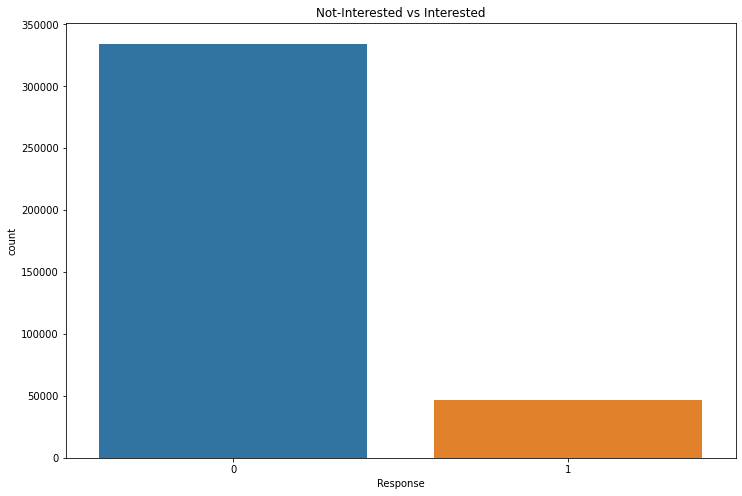

In [ ]:
# Chart - 1 visualization code
#Plot the count of the target variable
sns.countplot(df['Response'], data=df)
plt.title('Not-Interested vs Interested') #title for the countplot
plt.show()

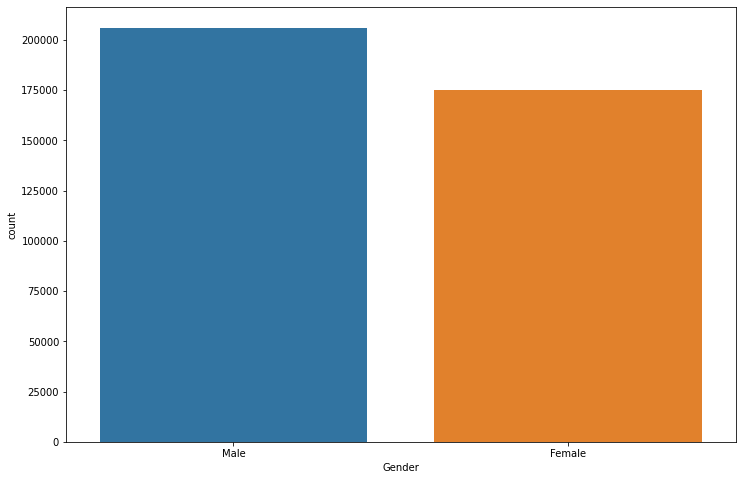

In [ ]:
# Visualization code
sns.countplot(df['Gender'])
plt.show()

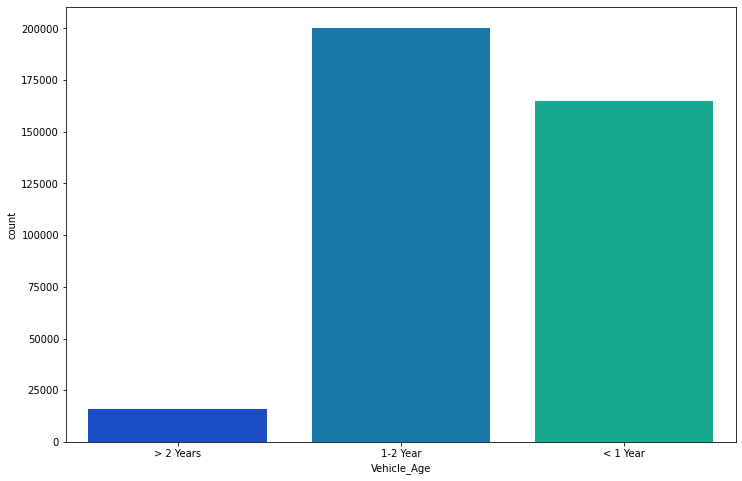

In [ ]:
sns.countplot(df['Vehicle_Age'], palette = 'winter')
plt.show()

##### 1. Why did you pick the specific chart?

Picked countplot to check the numbers of males and female in gender and number of Vehicle_Age in our dataset.

##### 2. What is/are the insight(s) found from the chart?

For the above plot, we can say that the no. of male customers in our data set is higher than female customers and Vehicle_Age 1-2 Year is more than < 1 Year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gender variable ratio in the dataset is almost equal, male category is slightly more than female.

#### Chart - 2

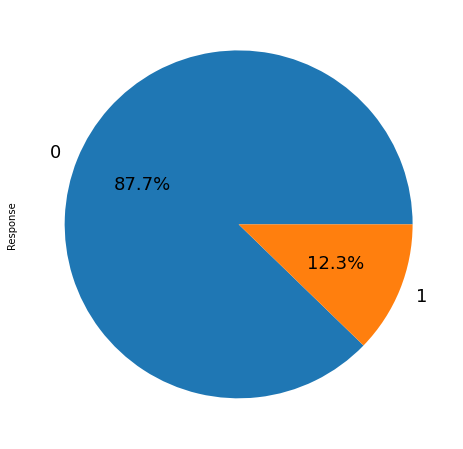

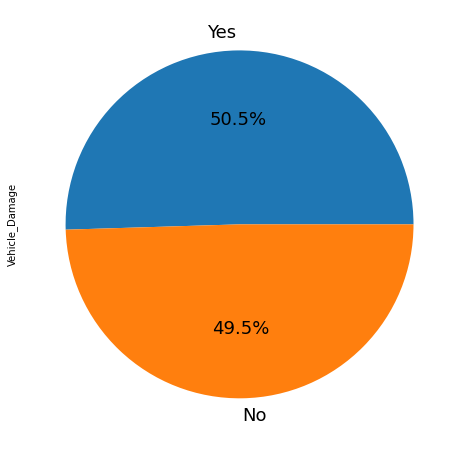

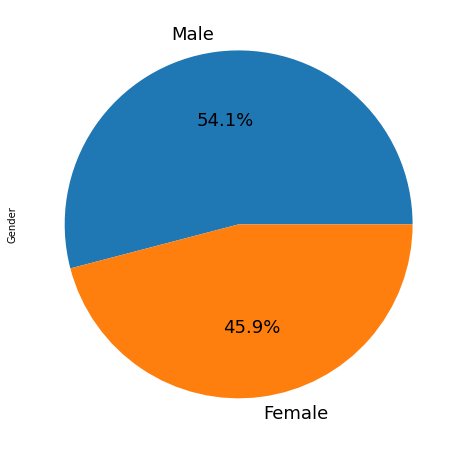

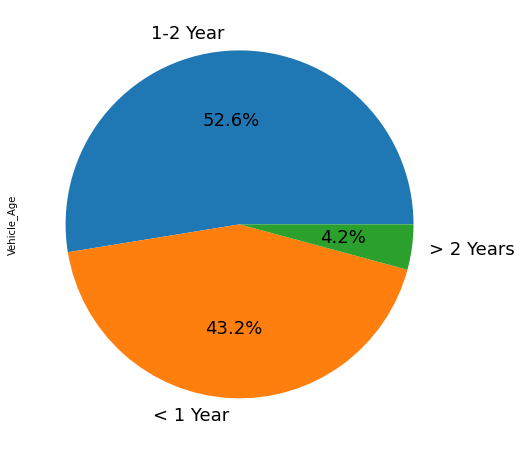

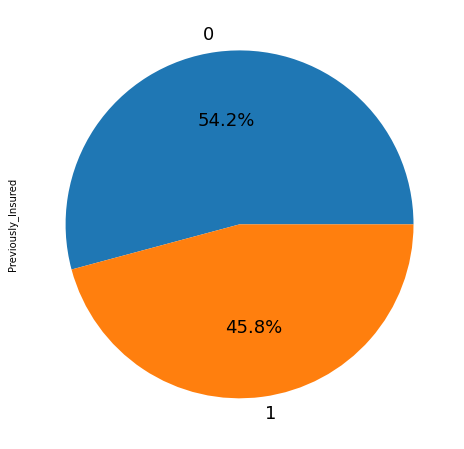

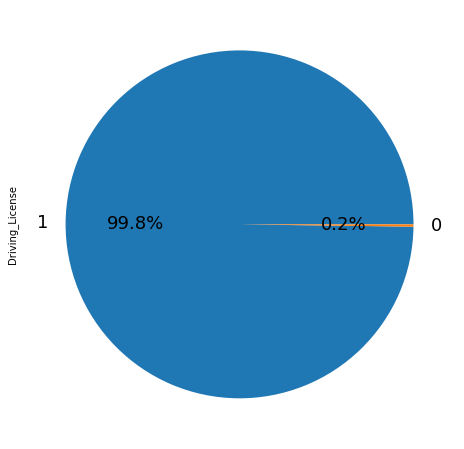

In [ ]:
# Chart - 2 visualization code
# percentage of features
df_box = df[['Response', 'Vehicle_Damage', 'Gender','Vehicle_Age','Previously_Insured','Driving_License']]

for column in df_box :
    percent = df[column].value_counts()
    percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 15})
    plt.show()

##### 1. Why did you pick the specific chart?

Picked pie chart to check the percentage in a particular feature.

##### 2. What is/are the insight(s) found from the chart?

54.1% of customers are male and 45.9% of customers are female.

Most of the customers are young people.

99.8% of customers have driving licence.

45.8% of customers are Previously_Insured.

52.6 percent of consumers have vehicles that are between 1-2 years old.

Number of customers with car damage and those without are nearly equal.

87.7% of Customer are not interested in purchasing vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In feature 'Response' 0 is 87.7% and 1 only 12.3%. So, Dataset is imbalanced and we have to balance it.

#### Chart - 3

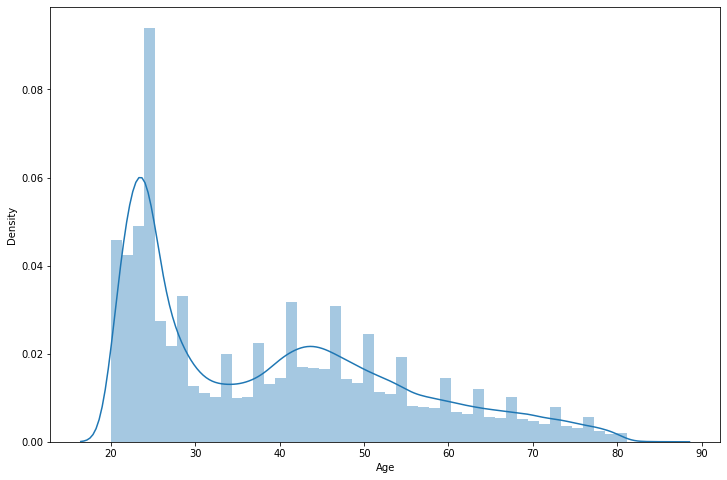

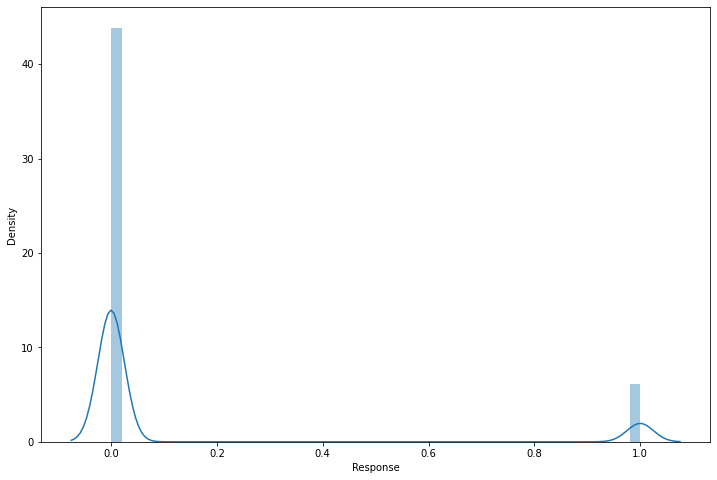

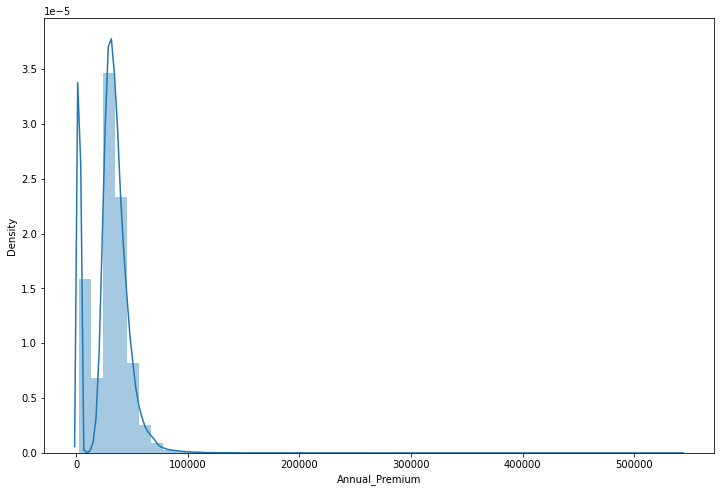

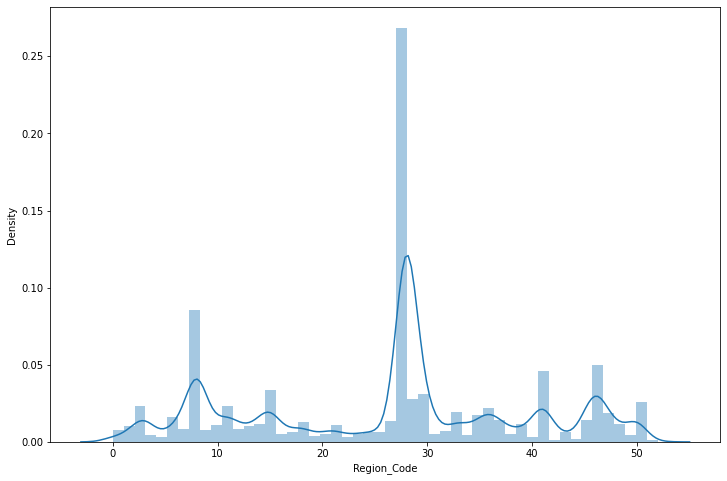

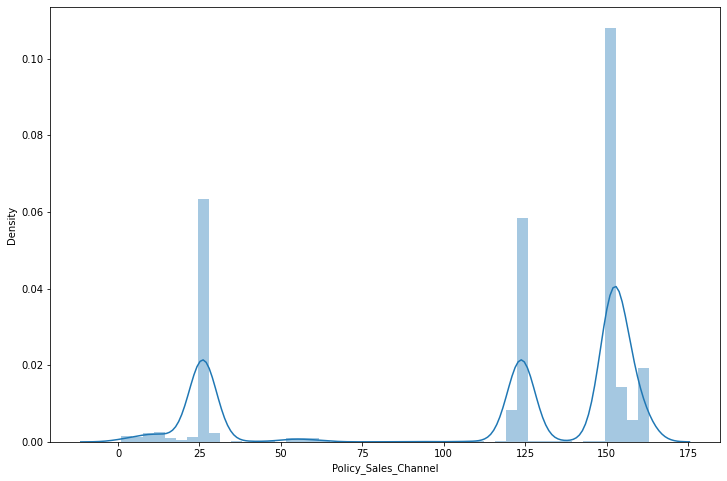

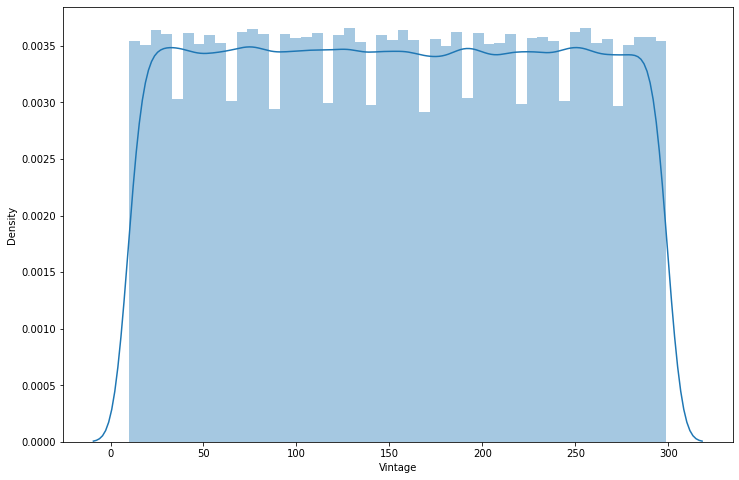

In [ ]:
# Chart - 3 visualization code
# Displot of datasets
sns.distplot(df['Age']);
plt.show()
sns.distplot(df['Response']);
plt.show()
sns.distplot(df['Annual_Premium']);
plt.show()
sns.distplot(df['Region_Code']);
plt.show()
sns.distplot(df['Policy_Sales_Channel']);
plt.show()
sns.distplot(df['Vintage']);
plt.show()

##### 1. Why did you pick the specific chart?

Used Displot to depict the Distribution of our features. . It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it can be implied that Annual Premium has a poitively skewed distribution.
From above we can also depict that Vintage has a approximatly uniform distribution.
Age is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to change Annual_Premium's distribution. It an cause overfitting.

#### Chart - 4

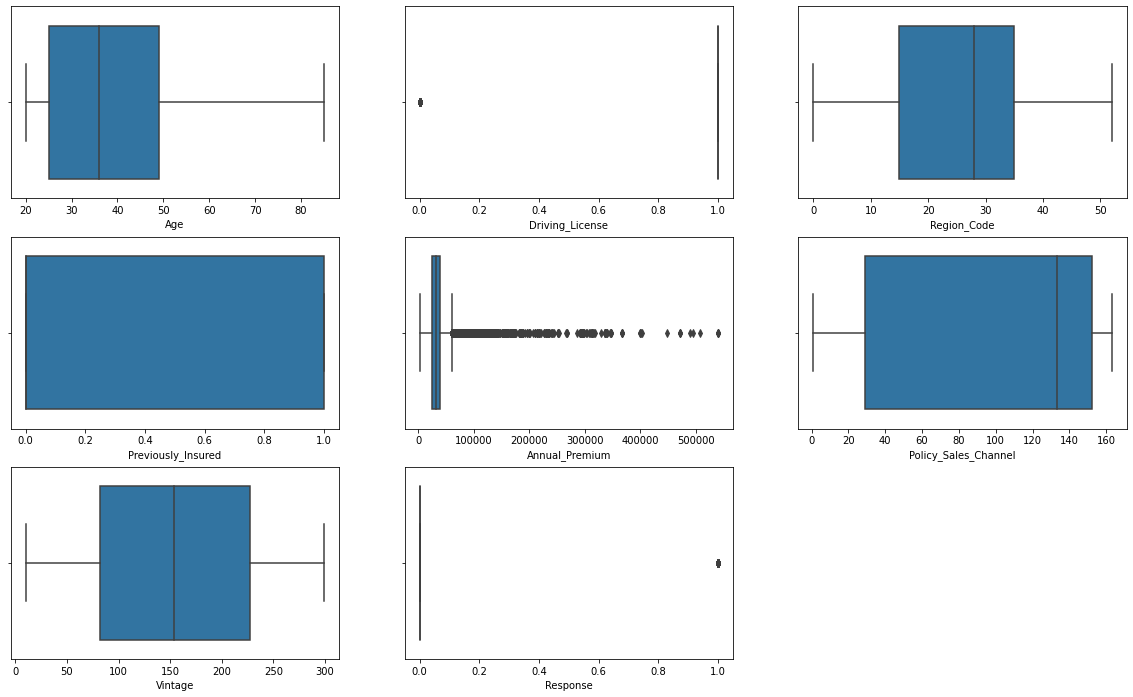

In [ ]:
# Chart - 4 visualization code
# checking outliers by using boxplot and droping object features
df_box = df.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

plt.figure(figsize = (20, 12))
n = 1
for column in df_box :
    plt.subplot(3,3,n)
    sns.boxplot(df[column])
    n += 1

##### 1. Why did you pick the specific chart?

Used boxplot() to see outliers in our Data. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

##### 2. What is/are the insight(s) found from the chart?

There's many outliers in the annual premium columns.

#### Chart - 5


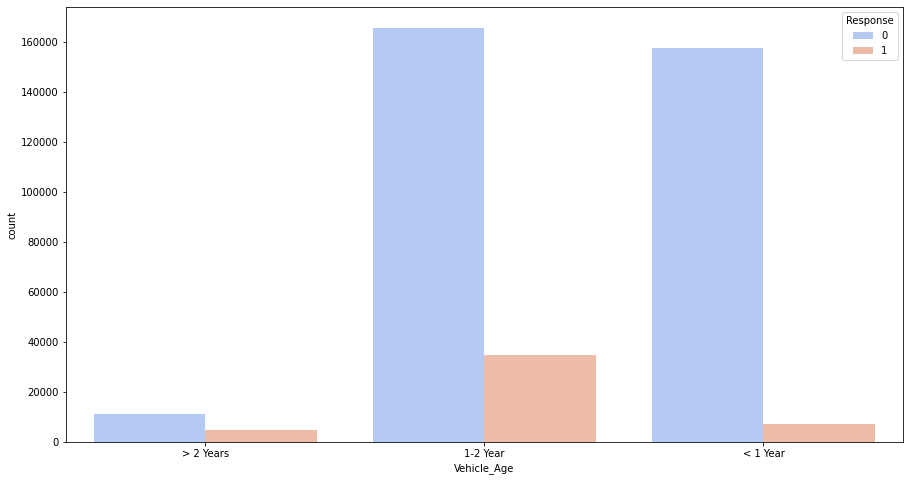

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 8))
sns.countplot(df['Vehicle_Age'], hue = df['Response'], palette = 'coolwarm')
plt.show()

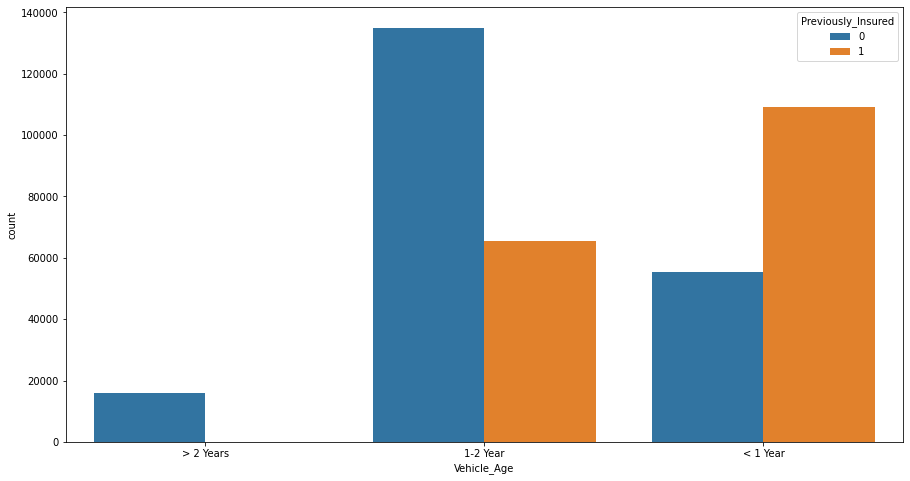

In [ ]:
# visualization code
plt.figure(figsize = (15, 8))
sns.countplot(df['Vehicle_Age'], hue = df['Previously_Insured'])
plt.show()

##### 1. Why did you pick the specific chart?

Countplot for Bivariate analysis of Vehicle_Age Vs Response and Vehicle_Age vs Previously_Insured. This plot Shows the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Vehicle_Age < 1 Year are more Previously_Insured and Vehicle_Age 1-2 Year have more positive Response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From above plot, we can say that if the vehicle's age is in between 1 to 2 years ,those vehicle owners are more likely to buy insurance

#### Chart - 6

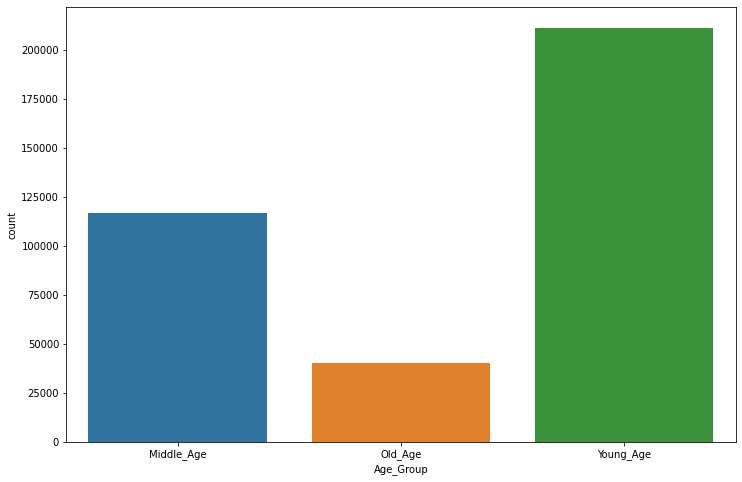

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = df1['Age_Group'],data = df1)
plt.show()

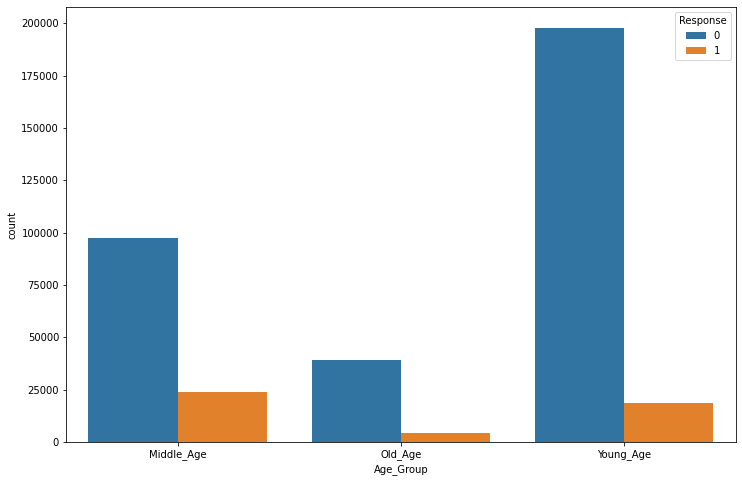

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = 'Age_Group', data = df1, hue='Response')
plt.show()

##### 1. Why did you pick the specific chart?

This plot Shows the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

From above graph, We can see that Customers belonging middle_Age has the highest no. of insurance and Young_Age group are less interested in taking the vehicle insurance.

#### Chart - 7

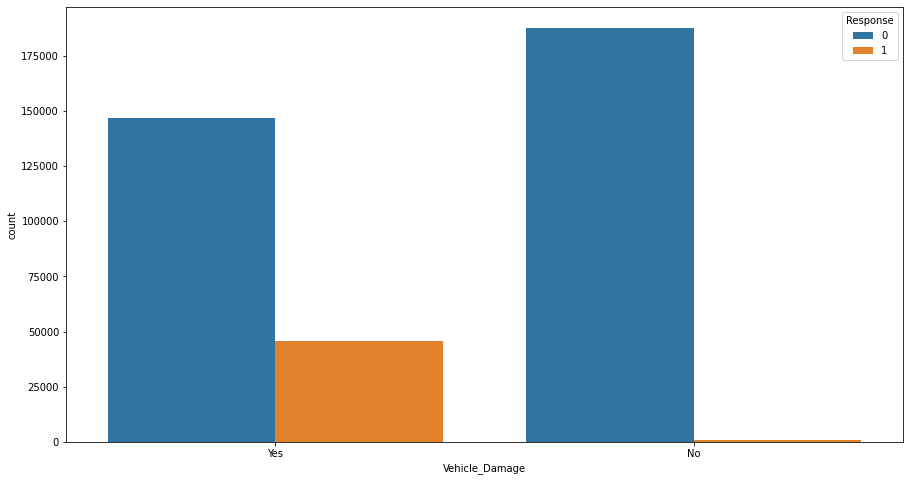

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (15, 8))
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.show()

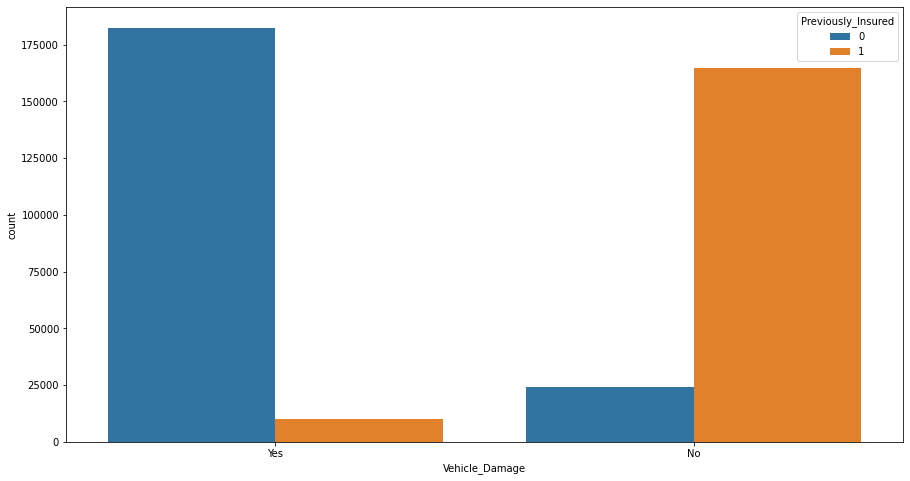

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(df['Vehicle_Damage'], hue = df['Previously_Insured'])
plt.show()

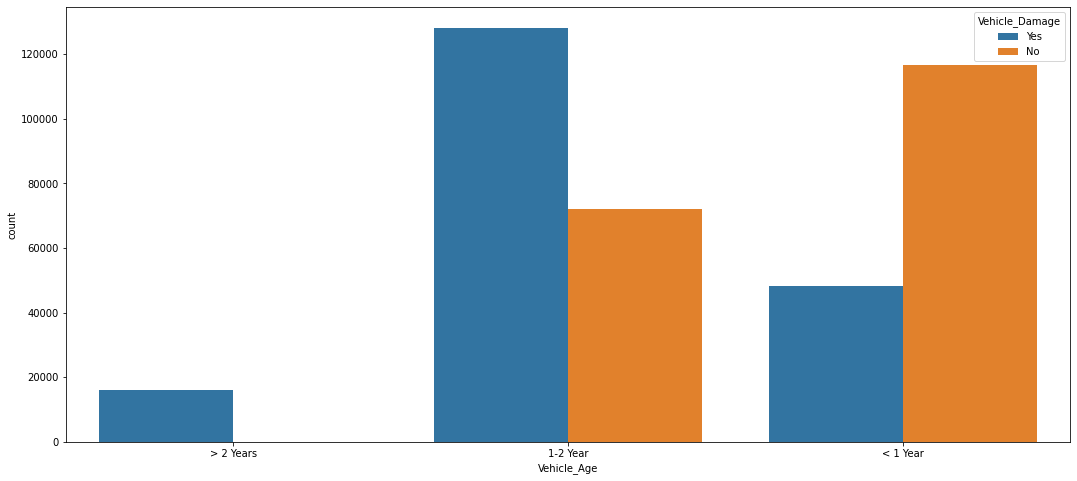

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Vehicle_Age'], hue = df['Vehicle_Damage'])
plt.show()

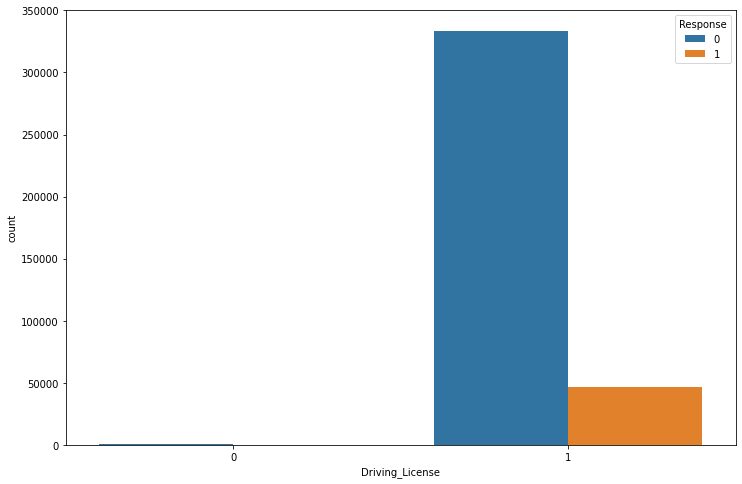

In [ ]:
sns.countplot(df['Driving_License'],hue=df['Response'])
plt.show()

##### 1. Why did you pick the specific chart?

This plot Shows the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Customers who are interested in Vehicle Insurance almost all have driving license.
From the above plot, we can say that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Due to their personal experience with the costs associated with vehicle repairs, customers with vehicle damage are more likely to purchase insurance.
Compared to consumers with vehicles less than one year old, those with vehicles between one and two years old are more interested in purchasing insurance.

#### Chart - 8

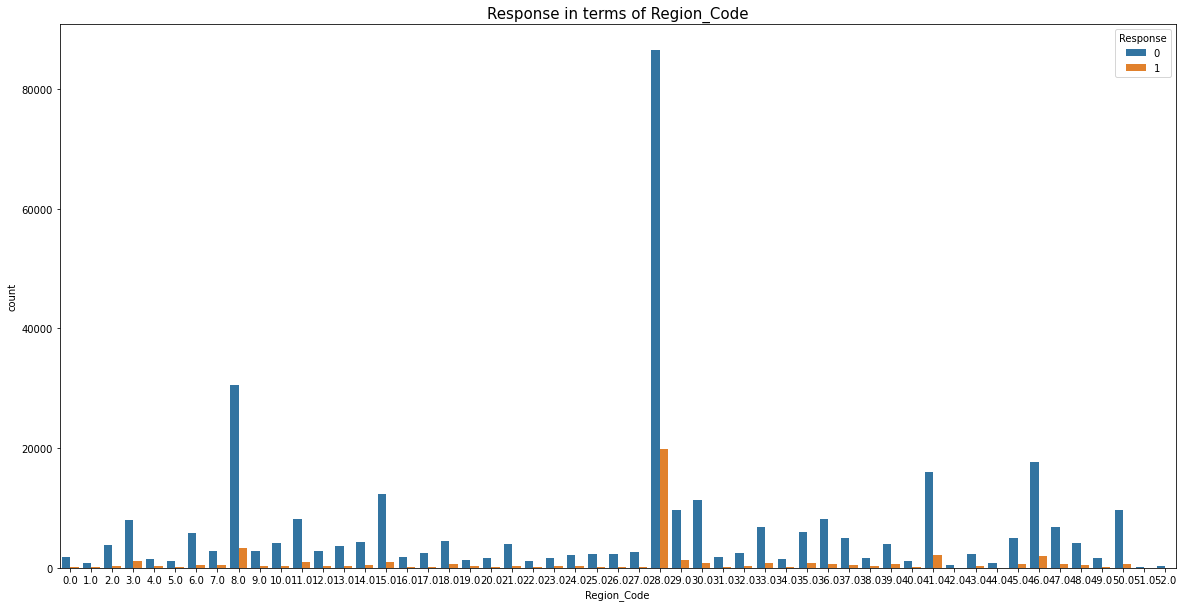

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=df)
plt.title('Response in terms of Region_Code', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Used countplot for Bivariate analysis of Age and Region_Code.

##### 2. What is/are the insight(s) found from the chart?

Region Code - 0.28 has the highest numbers of customers.

#### Chart - 9

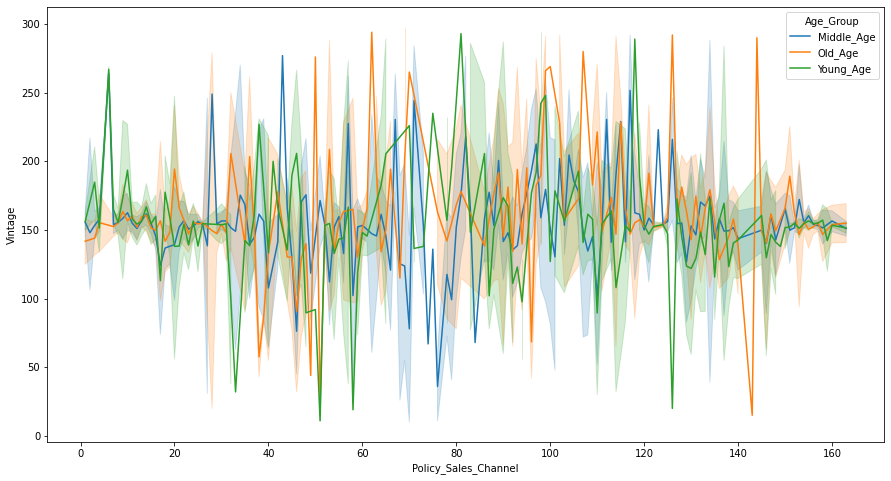

In [ ]:
# Chart - 9 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.lineplot(data=df1,x='Policy_Sales_Channel',y='Vintage',hue ='Age_Group')
plt.show()

##### 1. Why did you pick the specific chart?

Using Seaborn lineplot() will determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

##### 2. What is/are the insight(s) found from the chart?

Above line plot, shows the comparision of the age group between Vintage and Policy Sales Channel.

#### Chart - 10

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

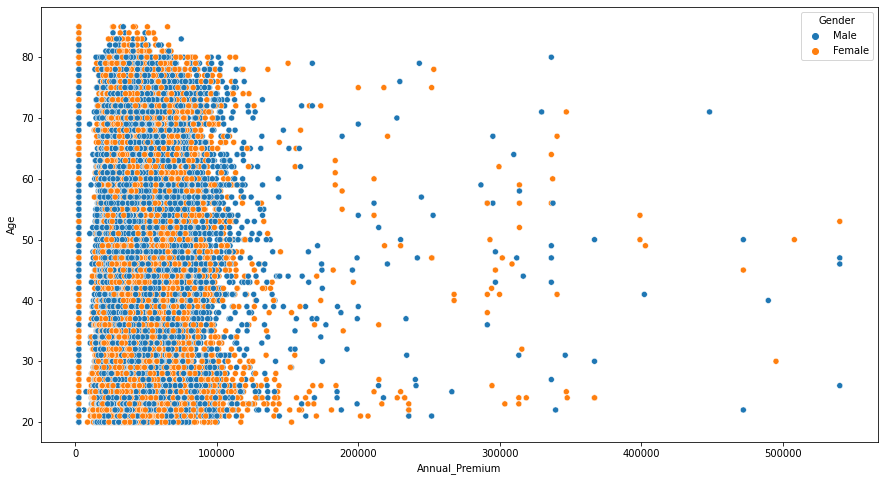

In [ ]:
# Chart - 10 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Annual_Premium',y='Age',hue='Gender')
plt.show()

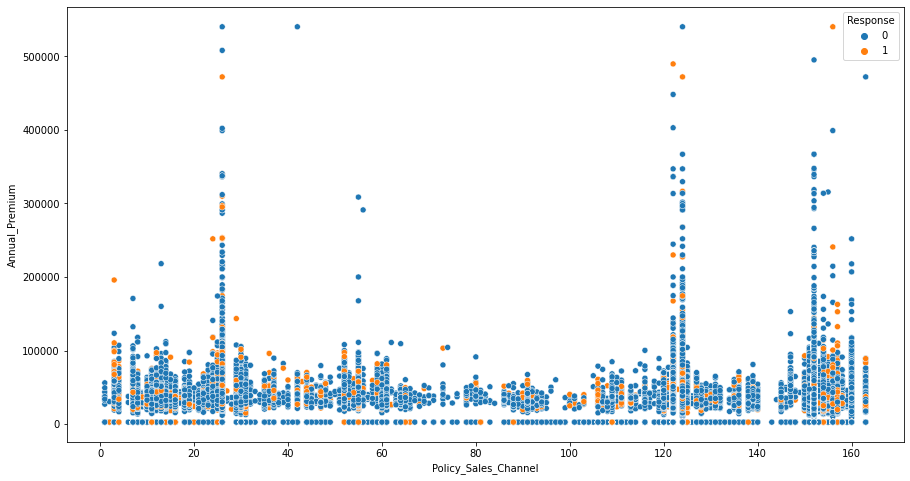

In [ ]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,y='Annual_Premium',x='Policy_Sales_Channel',hue='Response')
plt.show()

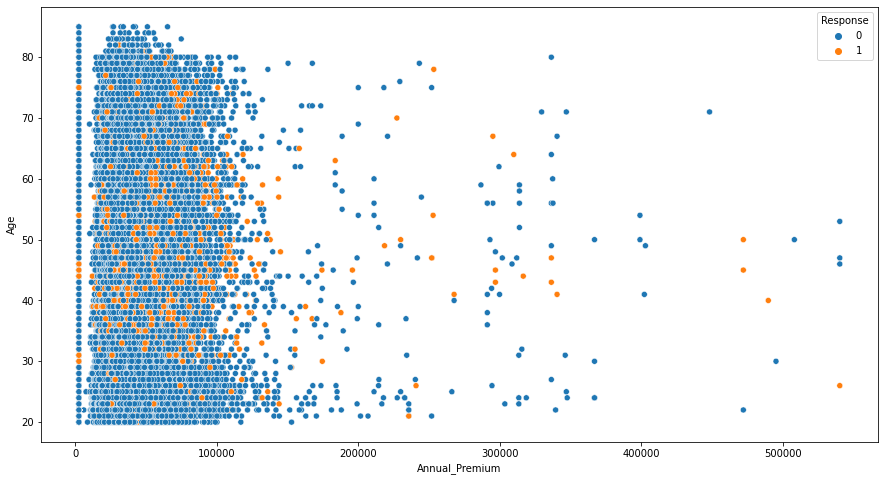

In [ ]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Annual_Premium',y='Age',hue='Response')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

##### 2. What is/are the insight(s) found from the chart?

Above plots, shows the Annual_Premium of people based on their Age and Gender.  Second plot, shows relationship between Annual_Premium and Policy_Sales_Channel.

#### Chart - 11

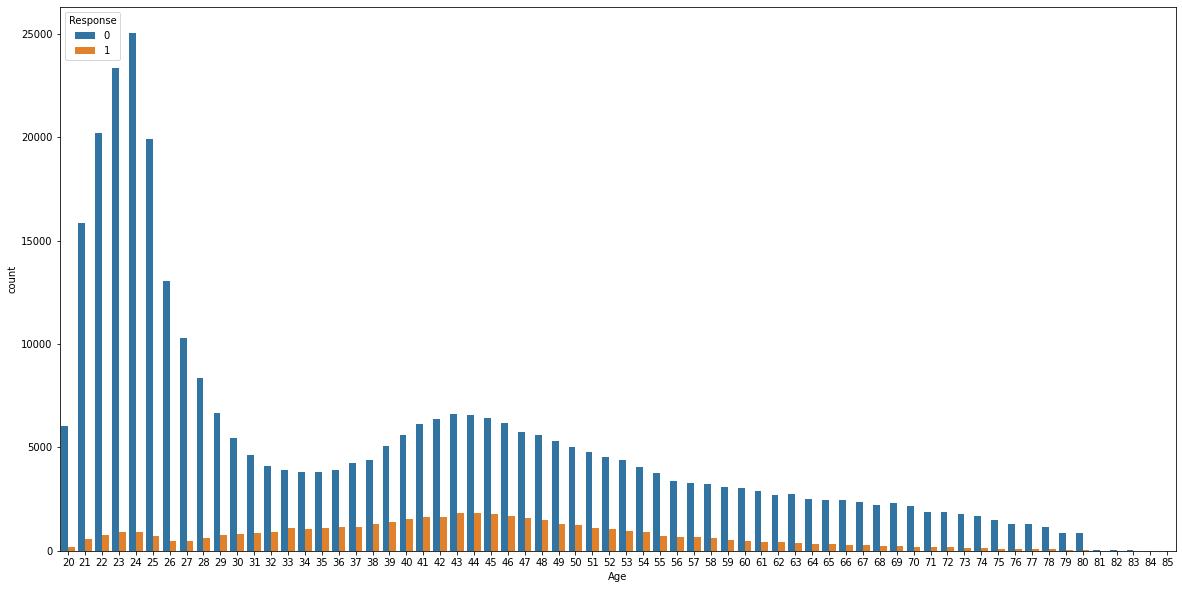

In [ ]:
# Chart - 11 visualization code
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)
plt.show()

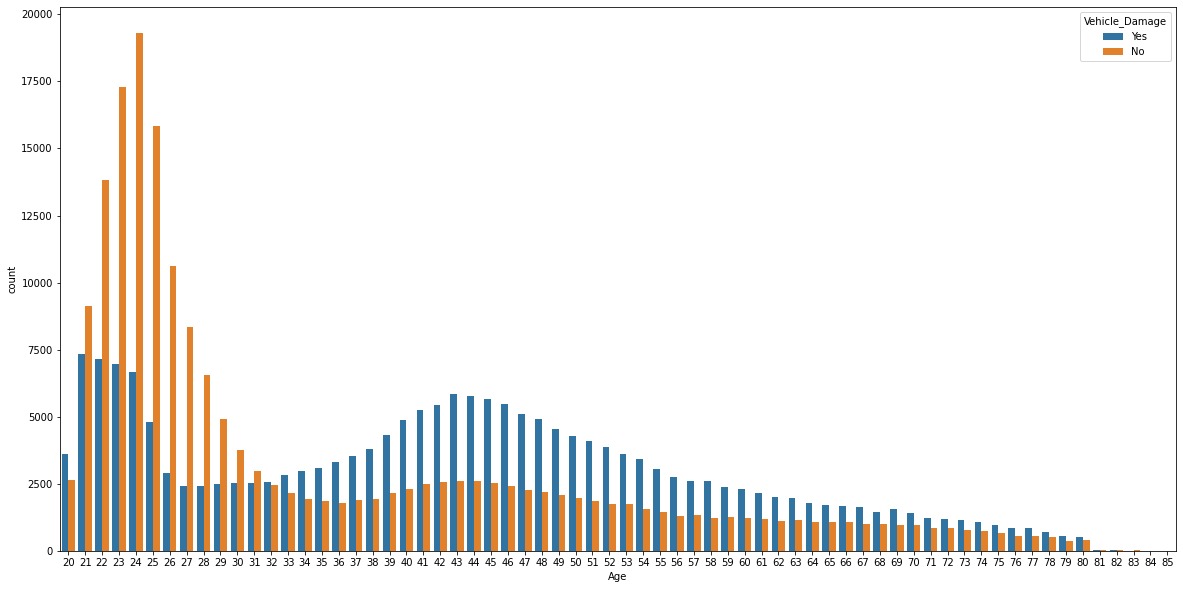

In [ ]:
# visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Vehicle_Damage',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

I Used countplot for Bivariate analysis of Age based on Response and Vehicle_Damage.This plot Shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Customers of age between 30 to 60 are more likely to buy insurance.
Ages from 20 to 30 have high number of 'Response' 0.

The proportion of vehicles that are damaged vs non-damaged is lower in the range in the range of 20-30 age group whereas, for age group 45-80, the proportion of damaged vehicles is more than non-damaged ones.

#### Chart - 12

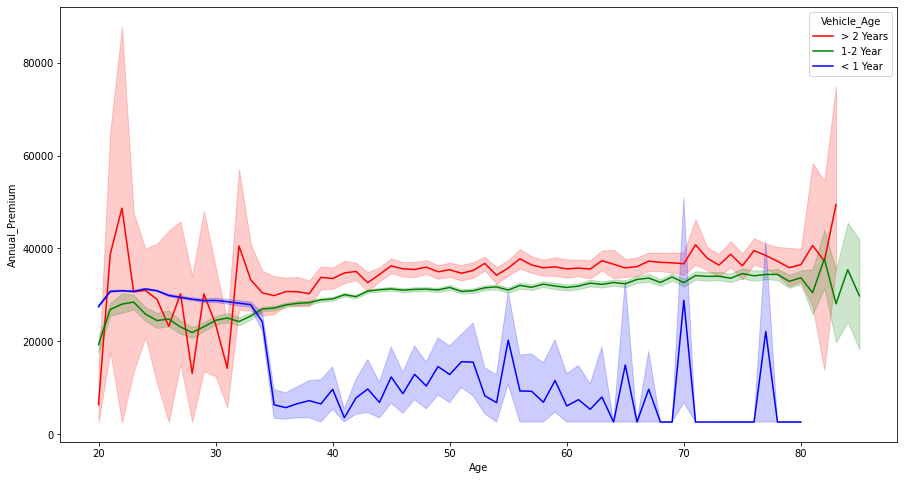

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Age', y='Annual_Premium', hue='Vehicle_Age', palette=['r', 'g', 'b'])
plt.show()

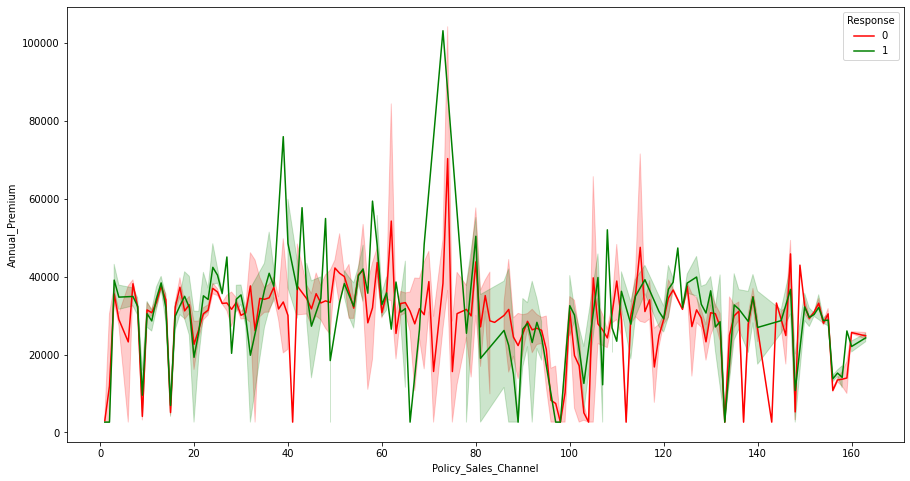

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Policy_Sales_Channel', y='Annual_Premium', hue='Response', palette=['r', 'g'])
plt.show()

##### 1. Why did you pick the specific chart?

Using Seaborn lineplot() will determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to. I used Seaborn Line Plot for Multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From the plot, we can say that the chances of taking a vehicle insurance is higher if vehicle is damaged irrespective of VehicleAge group. With the increase in vehicle age, the chances of taking vehicle insurance also increases.
We can says that the Annual_Premium is comparetively higher for customers with damaged vehicle.

#### Chart - 13

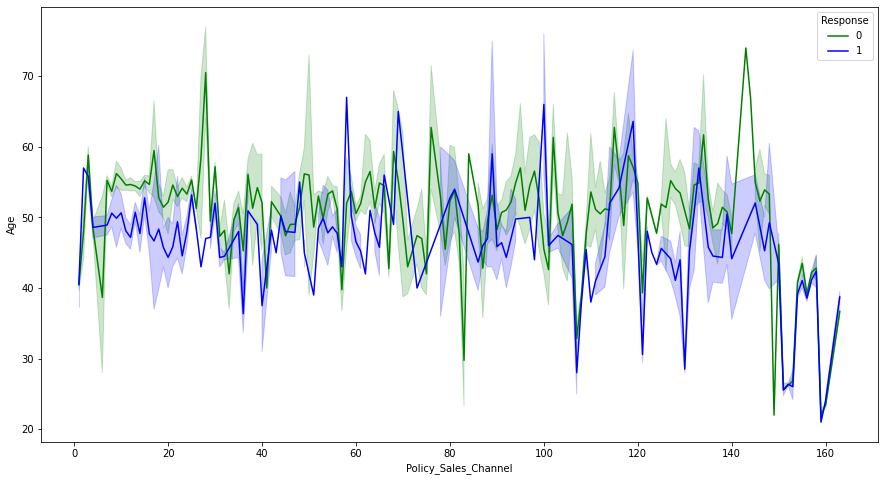

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(data = df,y ='Age', x='Policy_Sales_Channel', hue='Response', palette=['g', 'b'])
plt.show()

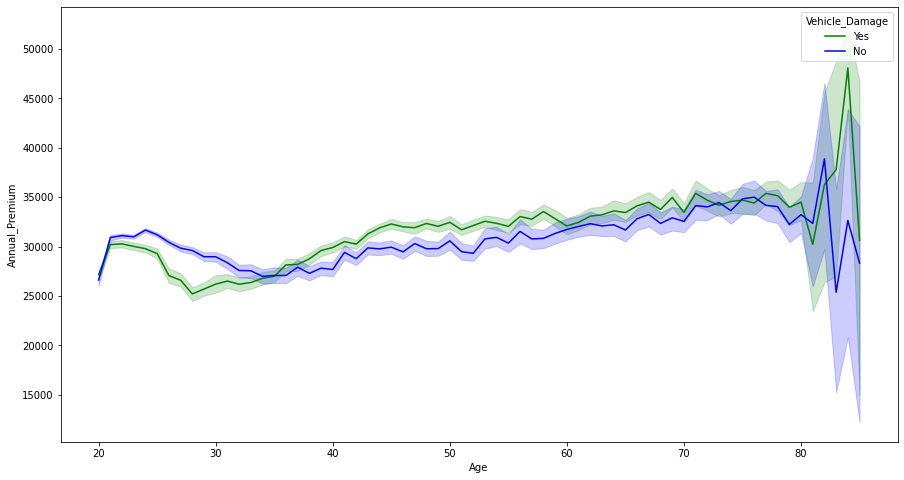

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Age', y='Annual_Premium', hue='Vehicle_Damage', palette=['g', 'b'])
plt.show()

##### 1. Why did you pick the specific chart?

Using Seaborn lineplot() will determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

##### 2. What is/are the insight(s) found from the chart?

Due to their personal experience with the costs associated with vehicle repairs, customers with vehicle damage are more likely to purchase insurance.

#### Chart - 14 - Correlation Heatmap

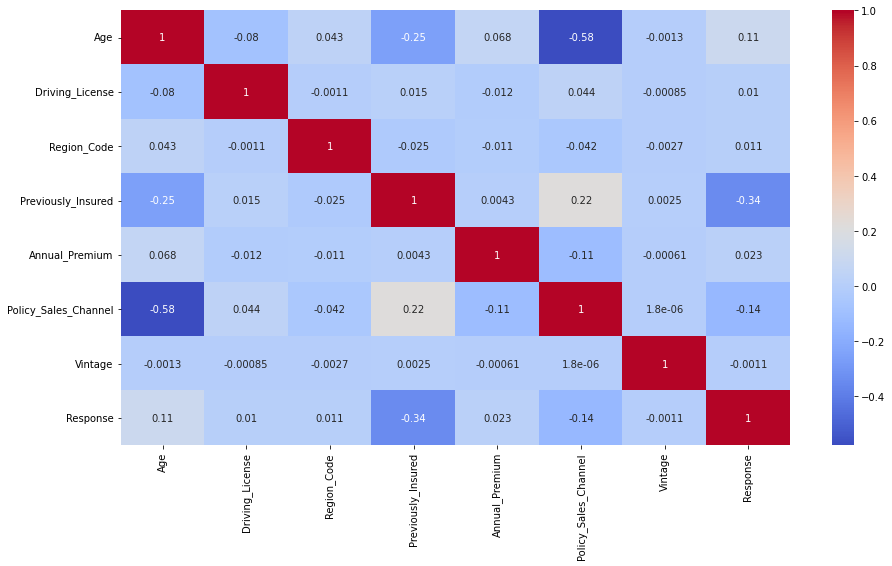

In [ ]:
# Correlation Heatmap visualization code
corr_df = df_int.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap matrix allows us to identify how well, or not so well, features within a dataset correlate with each other as well as whether that correlation is positive or negative.

##### 2. What is/are the insight(s) found from the chart?

Previously insured have correlation with dependent variable and Policy Sales Channel.
Age is negatively correlated with Policy Sales Channel and Previously insured.

#### Chart - 15 - Pair Plot

In [ ]:
df_pair = df[['Gender','Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]

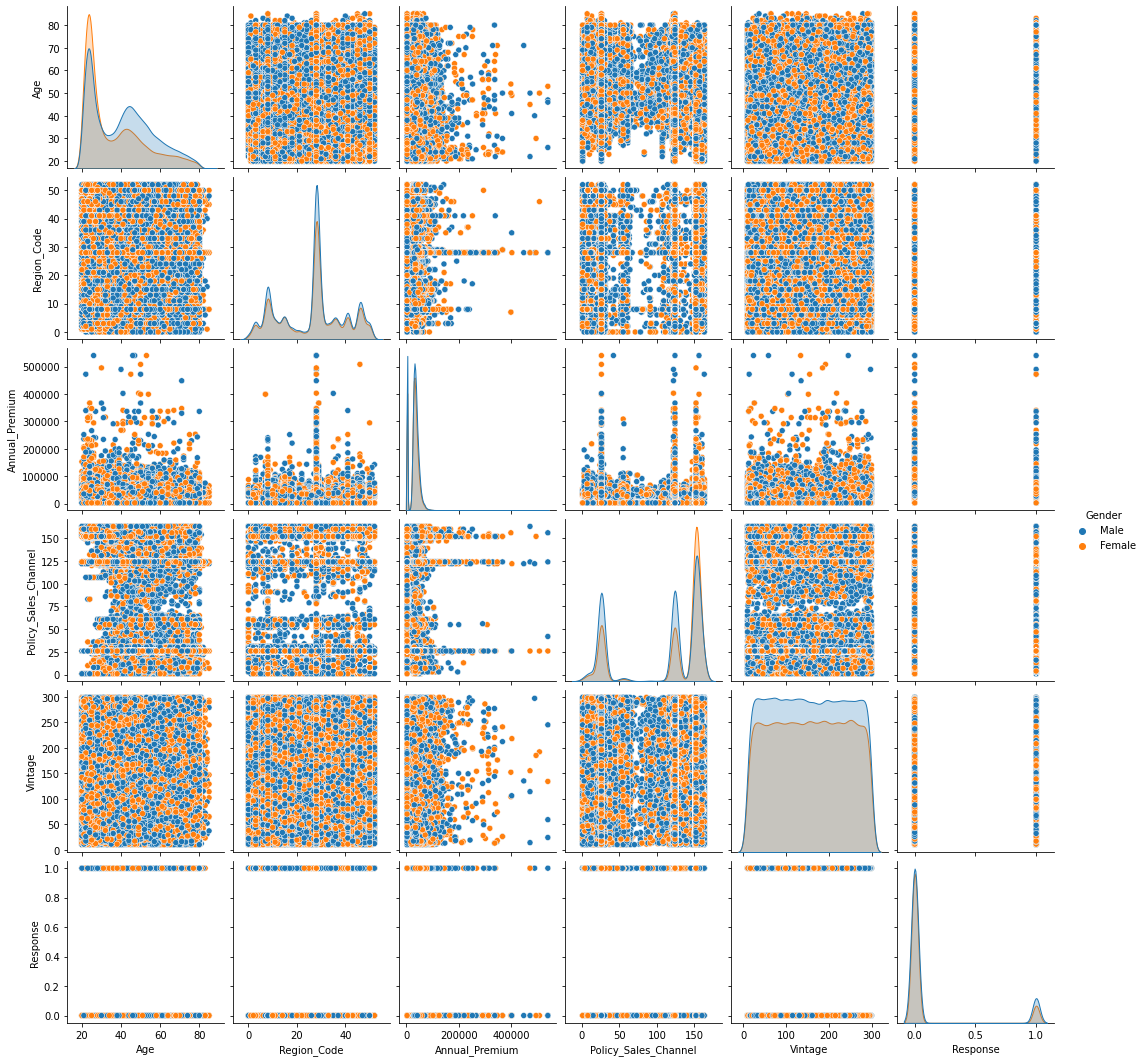

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_pair, hue='Gender')

##### 1. Why did you pick the specific chart?

The pairplot() offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships.

##### 2. What is/are the insight(s) found from the chart?

Above graph shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features. Due to more unique values,some of the features are uniformly distributed. The premium feature has a skewed relationship with the other features since it is skewed to the right.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come up with many more of these.
1. Gender: Male customers are more likely to buy health insurance than Female.

2. Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely between Customers of ages of 25-40 are likely to buy Insurance.
3. Vehicle_Damage: Customers who have damaged vehicles don't want to get the health insurance.

3. Driving_License: Customers who generally have Driving_License take Insurance.

4. Previously_Insured: Customers generally take One Vehicle insurance.

5. Vehicle_Age: The more the age of the vehicle the better.

6. Annual_Premium: Customers generally opt for Insurance where the premium is not too high

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Male customers are more likely to buy health insurance than Female.

#### 2. Perform an appropriate statistical test.

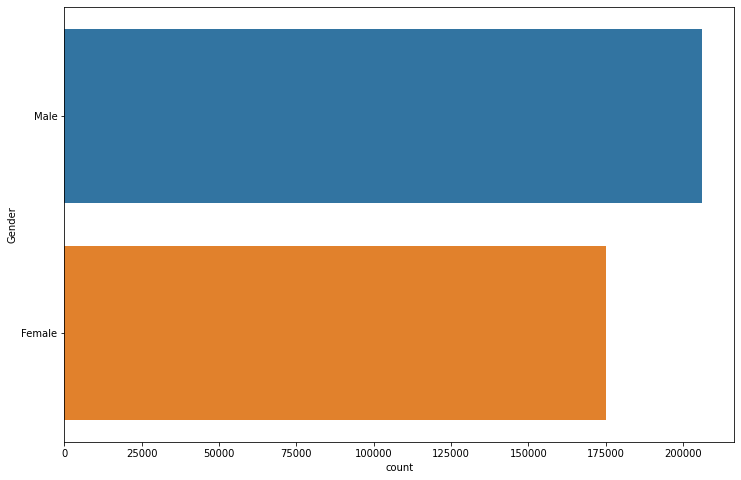

In [ ]:
# Perform Statistical Test to obtain P-Value
#H1 Male customers are more likely to health insurance than Female.
df_Response = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Gender'], data= df_Response)
plt.show()

From above plot, We can confirm that our first Hypothesis is true, Male customers are more likely to health insurance than Female.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

It is generally said that it is profitable to buy Insurance as early as possible so more likely between Customers of ages of 25-40 are likely to buy Insurance.

#### 2. Perform an appropriate statistical test.

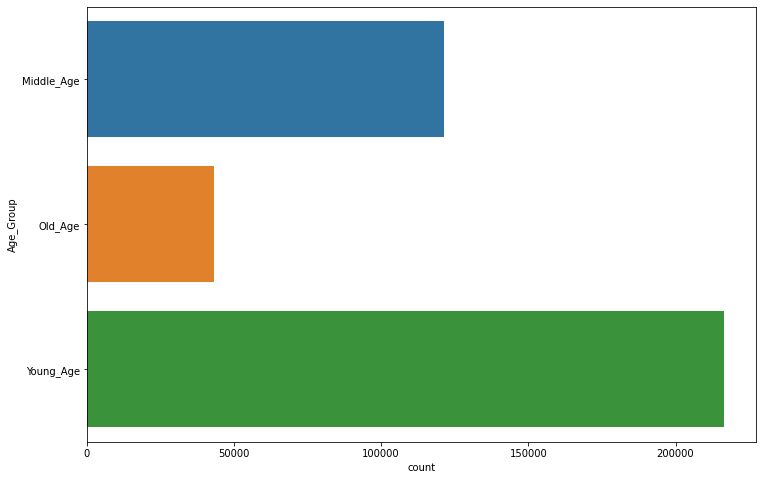

In [ ]:
# Perform Statistical Test to obtain P-Value
df_Age = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Age_Group'], data= df_Age)
plt.show()

Age_Group:
Young_Age - between 20 to 40,
Middle_Age - between 40 to 60,
Old_Age - above 60.

From above plot, We can confirm that our second Hypothesis is true.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers who have damaged vehicles don't want to get the health insurance.

#### 2. Perform an appropriate statistical test.

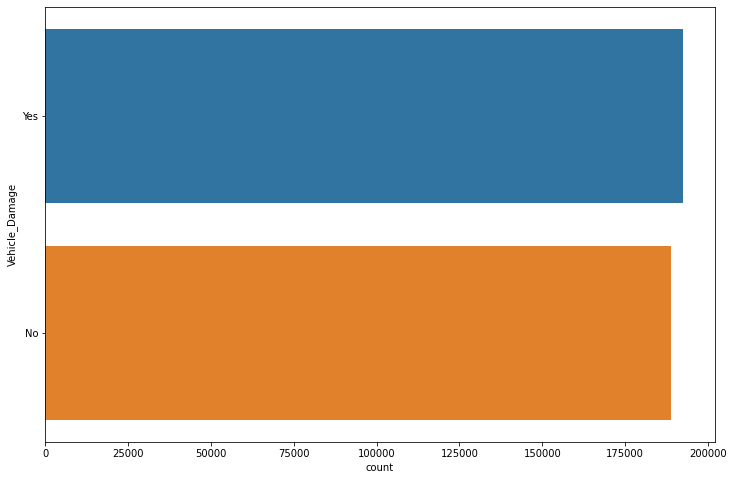

In [ ]:
# Perform Statistical Test to obtain P-Value
df_Vehicle_Damage = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Vehicle_Damage'], data= df_Vehicle_Damage)
plt.show()

From Above plot, we can Confirm that our third hypothesis is False. Customers who have damaged vehicle want insurance more then the customers who don't have damaged vehicles.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We user .isna() to check missing values and sum() to check the number of missing Values. There are zero missing values.

### 2. Handling Outliers

In [ ]:
# Handling outliers in Annual_Premium
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Q1,',',Q3)
print(IQR)
print(Lower_Whisker,',',Upper_Whisker)

24405.0 , 39400.0
14995.0
1912.5 , 61892.5


In [ ]:
# Handling Outliers & Outlier treatments
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

outlier_treatment(df)

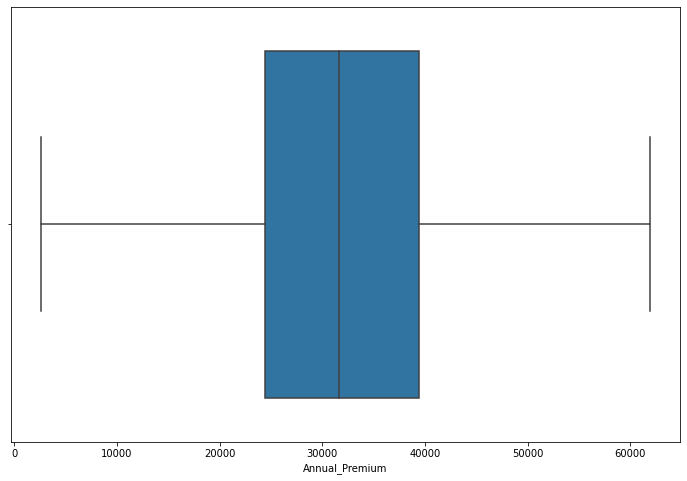

In [ ]:
sns.boxplot(df['Annual_Premium'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were many outliers in Annual_Premium.
Using IOR method, We keep Annual Premium under Upper_Whisker(61892.5) and remove all outliers.

From the above plots we can see that there are no more outliers in Annual Premium.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#changing categorical value to numerical values
cols_to_encode = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
df = pd.get_dummies(data = df, columns=cols_to_encode)
df.head()

id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1         28.0                   0         40454.0   
1   2   76                1          3.0                   0         33536.0   
2   3   47                1         28.0                   0         38294.0   
3   4   21                1         11.0                   1         28619.0   
4   5   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Female  Gender_Male  \
0                  26.0      217         1              0            1   
1                  26.0      183         0              0            1   
2                  26.0       27         1              0            1   
3                 152.0      203         0              0            1   
4                 152.0       39         0              1            0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0                     0                     0                      1   
1                     1                     0                      0   
2                     0                     0                      1   
3                     0                     1                      0   
4                     0                     1                      0   

   Vehicle_Damage_No  Vehicle_Damage_Yes  
0                  0                   1  
1                  1                   0  
2                  0                   1  
3                  1                   0  
4                  1                   0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used .get_dummies() on the object features to change them to numerical int features.

### Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_int.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
calc_vif(df_int[[i for i in df_int.describe().columns if i not in ['Response','id']]])

variables        VIF
0                   Age  10.451963
1       Driving_License  35.882484
2           Region_Code   4.953917
3    Previously_Insured   1.986897
4        Annual_Premium   4.817380
5  Policy_Sales_Channel   7.755323
6               Vintage   4.373194

In [ ]:
calc_vif(df_int[[i for i in df_int.describe().columns if i not in ['Response','id','Driving_License']]])

variables       VIF
0                   Age  5.161411
1           Region_Code  4.469044
2    Previously_Insured  1.924678
3        Annual_Premium  4.271015
4  Policy_Sales_Channel  4.089496
5               Vintage  4.019734

##### Multicollinearity between features.

There is high multicollinearity VIF with the Driving_License in our data. So, We can remove Driving_license for ML models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

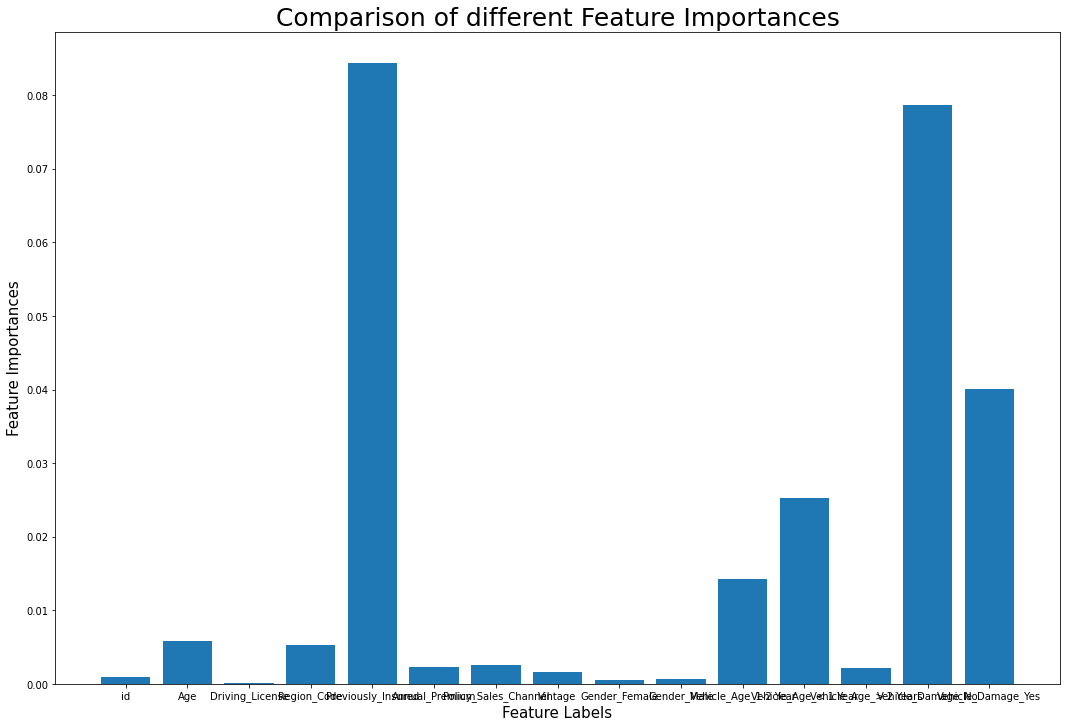

In [ ]:
# copying original dataset for comparsion
df_selection = df.copy()
x = df_selection.drop(columns = ['Response'])
y = df_selection.Response
# Building the model
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)

# Plotting a Bar Graph to compare the models
plt.figure(figsize = (18,12))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()

In [ ]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

Feature Name		 Importance
-------------------------------------


Driving_License          0.000100
Gender_Female            0.000530
Gender_Male              0.000619
id                       0.000936
Vintage                  0.001653
Vehicle_Age_> 2 Years    0.002190
Annual_Premium           0.002342
Policy_Sales_Channel     0.002515
Region_Code              0.005311
Age                      0.005841
Vehicle_Age_1-2 Year     0.014256
Vehicle_Age_< 1 Year     0.025269
Vehicle_Damage_Yes       0.040129
Vehicle_Damage_No        0.078608
Previously_Insured       0.084423
dtype: float64

We can remove less important features from the data set like
Driving_License , Gender and id.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# defining dependent variable
dep_var = 'Response'

# defining independent variable
indep_var = df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

In [ ]:
df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

Index(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

#### 2. Feature Selection

In [ ]:
# Creating the data of independent variables
X = df[indep_var]

# Creating the dependent variable data
y = df[dep_var]

##### What all feature selection methods have you used  and why?

Multicollinearity and Feature Importance methods are used to select features for modeling.

##### Which all features you found important and why?

Previously_Insured, Vehicle_Age, Vehicle_Damage are the important features as seen in feature importance above.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f'{X_train.shape}\t{X_test.shape}\t {y_train.shape}\t {y_test.shape}')

(304887, 11)	(76222, 11)	 (304887,)	 (76222,)


##### What data splitting ratio have you used and why?

Splitting ratio is 20 test and 80 train.

### 6. Handling Imbalanced Dataset

In [ ]:
# Checking imbalance in our dependent feature
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

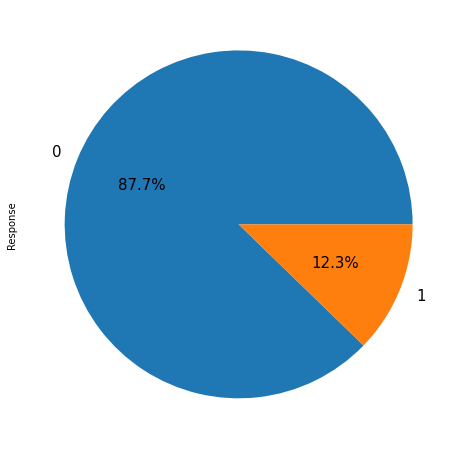

In [ ]:
# percentage of imbalance in 'Response'
percent = df['Response'].value_counts()
percent.plot.pie(fontsize= 15,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 12})
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

In feature 'Response' 0 is 87.7% and 1 only 12.3%. So, Dataset is imbalanced and we have to balance it.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=5)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_train))
print('Resampled dataset shape', len(y_train))

Original dataset shape 381109
Resampled dataset shape 534694
Resampled dataset shape 534694
Resampled dataset shape 304887
Resampled dataset shape 304887


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset has now been balanced using the over_sampling SMOTE technique, and it is ready for training the model.

Original dataset shape 381109
Resampled dataset shape 534694


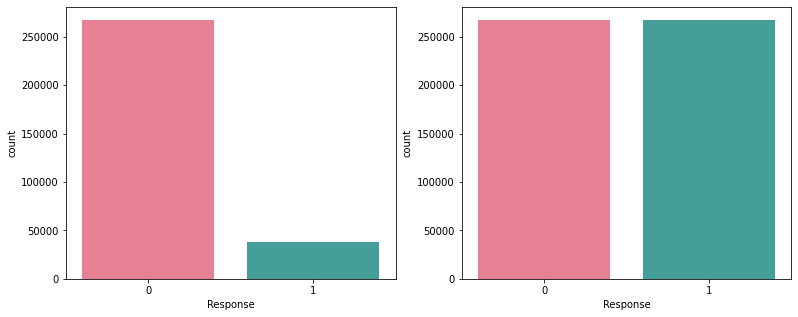

In [ ]:
# Vizualization of imbalanced and balanced dataset
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(y_train,palette='husl')
print('Original dataset shape {}'.format(len(df)))
print('Resampled dataset shape {}'.format(len(y_ros)))
plt.subplot(1,2,2)
sns.countplot(y_ros,palette='husl')
plt.show()

### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ros = scaler.fit_transform(X_ros)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

We used Standardization (StandardScaler) method for Data Scaling.

**Standardization**
Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0
and standard deviation(σ)=l.

## ***7. ML Model Implementation***

### ML Model - 1 **[** **LogisticRegression** **]**

In [ ]:
# ML Model - 1 Implementation(LogisticRegression)
model1 = LogisticRegression()
# Fit the Algorithm
model1 = model1.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model1.predict(X_ros)
y_pred_test = model1.predict(X_test)

In [ ]:
# Performance on train set
accuracy_score_train = accuracy_score(y_ros, y_pred_train)
precision_score_train = precision_score(y_ros, y_pred_train)
recall_score_train = recall_score(y_ros, y_pred_train)
f1_score_train = f1_score(y_ros, y_pred_train)
roc_auc_score_train = roc_auc_score(y_ros, y_pred_train)
print(accuracy_score_train,precision_score_train,recall_score_train,f1_score_train,roc_auc_score_train)

0.8265924061238764 0.7798967138859236 0.9100083412194638 0.8399436557476663 0.8265924061238764


In [ ]:
#Performance on test set
accuracy_score_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test)
recall_score_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
roc_auc_score_test = roc_auc_score(y_test, y_pred_test)
print(accuracy_score_test,precision_score_test,recall_score_test,f1_score_test,roc_auc_score_test)

0.7459526121067408 0.28864654171504395 0.7591057797164668 0.4182539205672054 0.7516297854019907


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[49897 17155]
 [ 2209  6961]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Function for ploting confusion matrix
def plot_confusion_matrix(model, X_test, y_test, y_pred):
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)
    plt.show()

# Function for ploting roc curve
def plot_roc_curve(model, X_test, y_test, y_pred):
    plt.figure(figsize = (12,5))
    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')
    plt.show()

# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

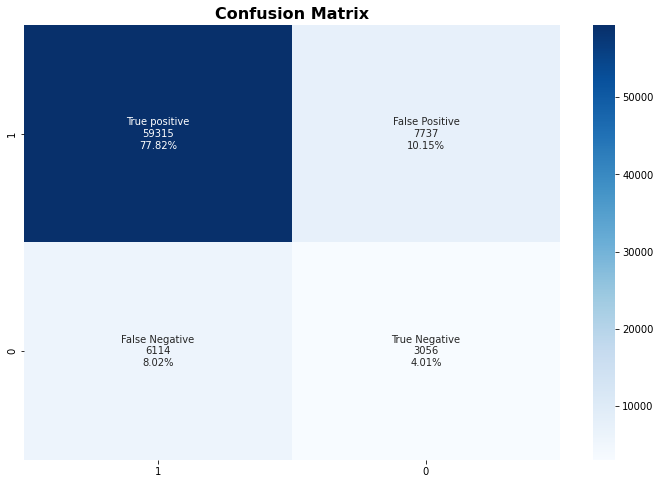

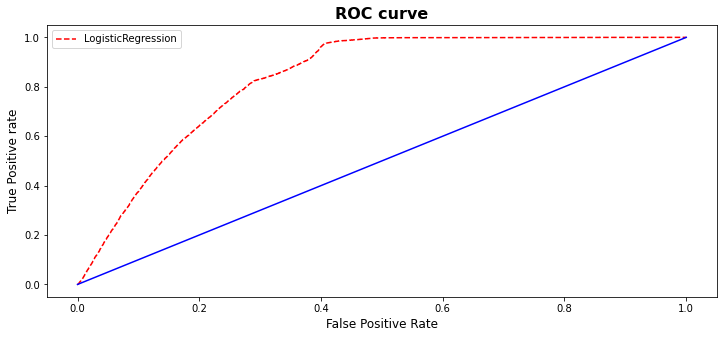

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model1, X_test, y_test, y_pred_test)
plot_roc_curve(model1, X_test, y_test, y_pred_test)

### ML Model - 2  **[** **DecisionTreeClassifier** **]**

In [ ]:
# ML Model - 2 Implementation(DecisionTreeClassifier)
model2 = DecisionTreeClassifier()
# Fit the Algorithm
model2 = model2.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model2.predict(X_ros)
y_pred_test = model2.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_dt_train = accuracy_score(y_ros, y_pred_train)
ps_dt_train = precision_score(y_ros, y_pred_train)
rs_dt_train = recall_score(y_ros, y_pred_train)
f1s_dt_train = f1_score(y_ros, y_pred_train)
ras_dt_train = roc_auc_score(y_ros, y_pred_train)
print(as_dt_train, ps_dt_train, rs_dt_train,f1s_dt_train, ras_dt_train)

0.9995399237694831 0.9997380641443491 0.9993416795400734 0.9995398325439403 0.9995399237694831


In [ ]:
# Checking the Performance on test set
as_dt_test = accuracy_score(y_test, y_pred_test)
ps_dt_test = precision_score(y_test, y_pred_test)
rs_dt_test = recall_score(y_test, y_pred_test)
f1s_dt_test = f1_score(y_test, y_pred_test)
ras_dt_test = roc_auc_score(y_test, y_pred_test)
print(as_dt_test,ps_dt_test,rs_dt_test,f1s_dt_test, ras_dt_test)

0.81822833302721 0.2837625773100711 0.3352235550708833 0.30735389691546267 0.609753697239552


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

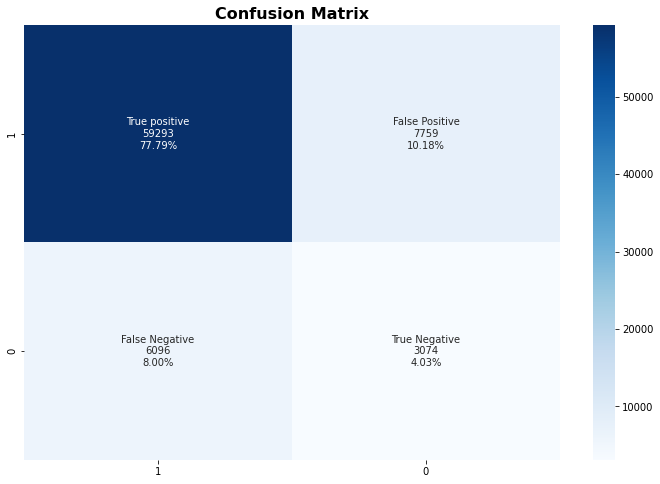

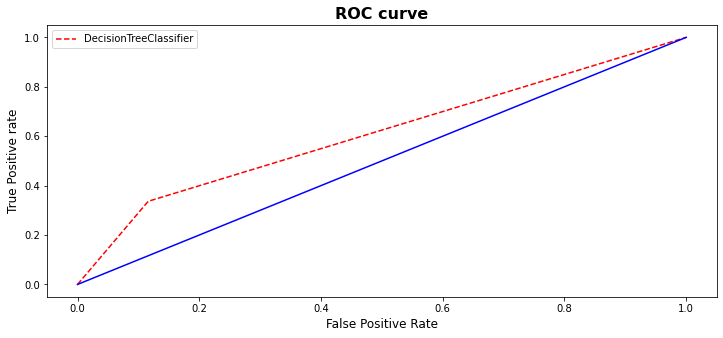

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model2, X_test, y_test, y_pred_test)
plot_roc_curve(model2, X_test, y_test, y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model2_classifier = DecisionTreeClassifier()
parameters_decision_tree = {"max_depth" : [5,7,9],"min_samples_leaf":[1,3,5],"min_weight_fraction_leaf":[0.0,0.3,0.4,0.5],"max_leaf_nodes":[20,40,60],'random_state':[24]}
model2_classifier_CV = GridSearchCV(model2_classifier,param_grid = parameters_decision_tree,cv =3, scoring = 'accuracy')
# Fit the Algorithm
model2_classifier.fit(X_ros, y_ros)
# Predict on the model
y_pred_train =  model2_classifier.predict(X_ros)
y_pred_test  = model2_classifier.predict(X_test)

In [ ]:
# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

In [ ]:
# evaluation Metric Score
evaluation_metrics(model2_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score
0        0.818045   0.284509  0.338277  0.309072       0.610967


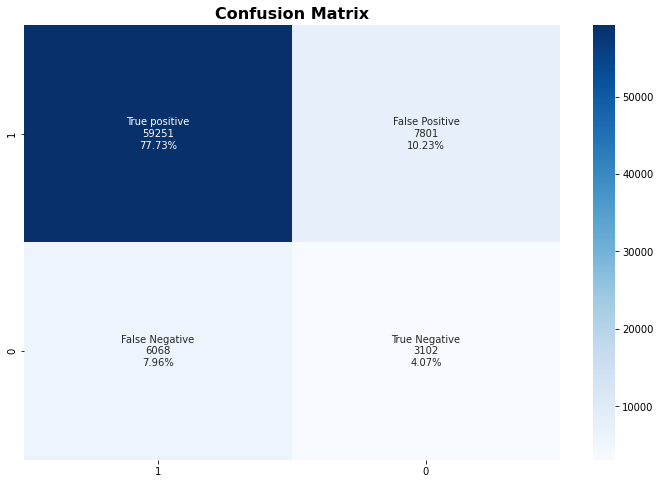

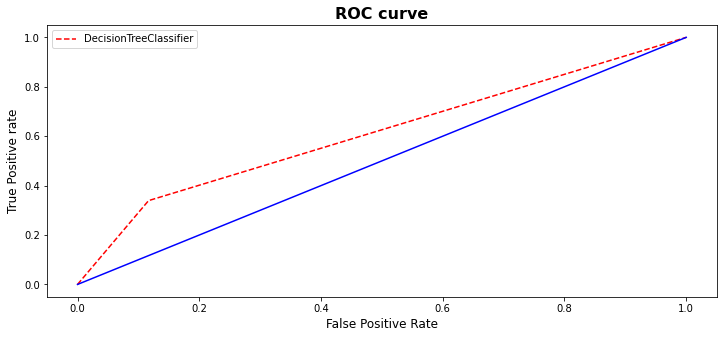

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model2_classifier, X_test, y_test, y_pred_test)
plot_roc_curve(model2_classifier, X_test, y_test, y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV technique for hyperparameter optimization and accuracy for scoring.  

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There isn't much improvement.

### ML Model - 3 **[** **RandomForestClassifier** **]**

In [ ]:
# ML Model - 3 Implementation (RandomForestClassifier)
model3 = RandomForestClassifier()
# Fit the Algorithm
model3 = model3.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model3.predict(X_ros)
y_pred_test = model3.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_rf_train = accuracy_score(y_ros, y_pred_train)
ps_rf_train = precision_score(y_ros, y_pred_train)
rs_rf_train = recall_score(y_ros, y_pred_train)
f1s_rf_train = f1_score(y_ros, y_pred_train)
ras_rf_train = roc_auc_score(y_ros, y_pred_train)
print(as_rf_train,ps_rf_train,rs_rf_train,f1s_rf_train,ras_rf_train)

0.9995361833123244 0.999289663861462 0.9997830534847969 0.9995362977865699 0.9995361833123244


In [ ]:
# Checking the Performance on test set
as_rf_test = accuracy_score(y_test, y_pred_test)
ps_rf_test = precision_score(y_test, y_pred_test)
rs_rf_test = recall_score(y_test, y_pred_test)
f1s_rf_test = f1_score(y_test, y_pred_test)
ras_rf_test = roc_auc_score(y_test, y_pred_test)
print(as_rf_test,ps_rf_test,rs_rf_test,f1s_rf_test,ras_rf_test)

0.8276088268478917 0.3190849434925264 0.3817884405670665 0.3476318141197498 0.6351837269350873


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

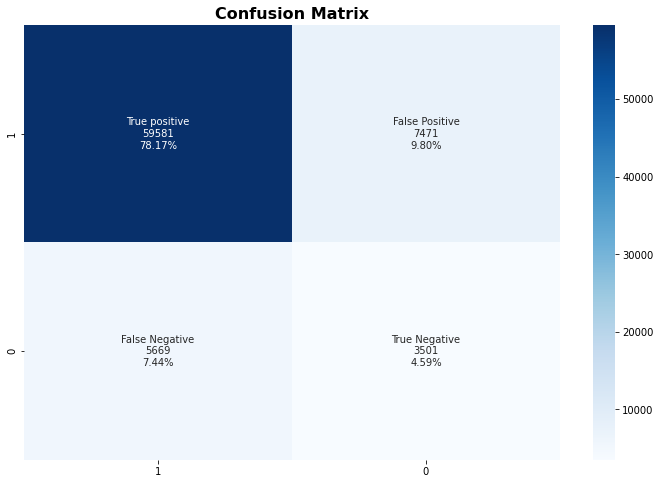

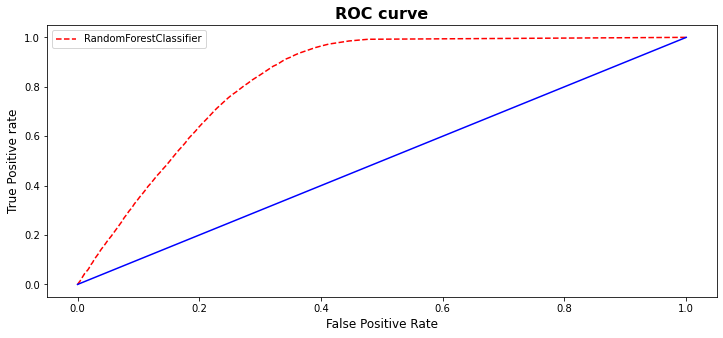

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model3, X_test, y_test, y_pred_test)
plot_roc_curve(model3, X_test, y_test, y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model3_classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50,70,100], "max_depth" : [5,25,50],"min_samples_leaf":[2,10,20],'random_state':[24]}
model3_classifier_CV = GridSearchCV(model3_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3,verbose=2)
# Fit the Algorithm
model3_classifier_CV.fit(X_ros, y_ros)
# Predict on the model
y_pred_train =  model3_classifier_CV.best_estimator_.predict(X_ros)
y_pred_test  = model3_classifier_CV.best_estimator_.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=  10.5s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=  11.5s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=  14.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=  14.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=  14.0s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=  19.6s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=  20.4s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=  20.3s
[CV] END max_depth=5, min_samples_leaf=10, n_estimators=50, random_state=24; tota

In [ ]:
model3_classifier_CV.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=2, random_state=24)

In [ ]:
# Evaluation_metrics
evaluation_metrics(model3_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score
0        0.826586   0.324732  0.408942  0.362004       0.646322


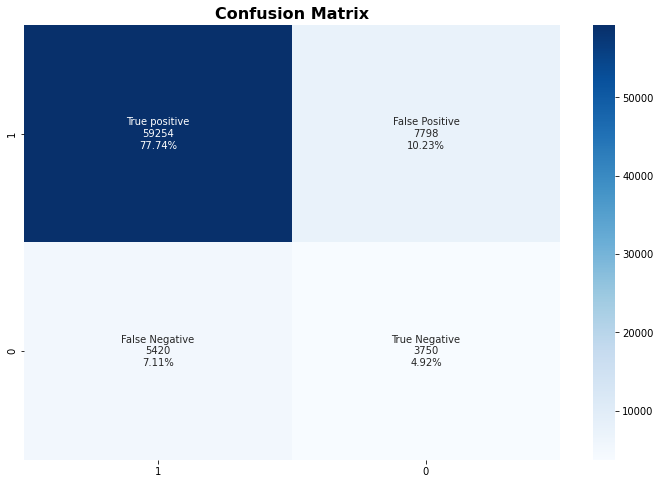

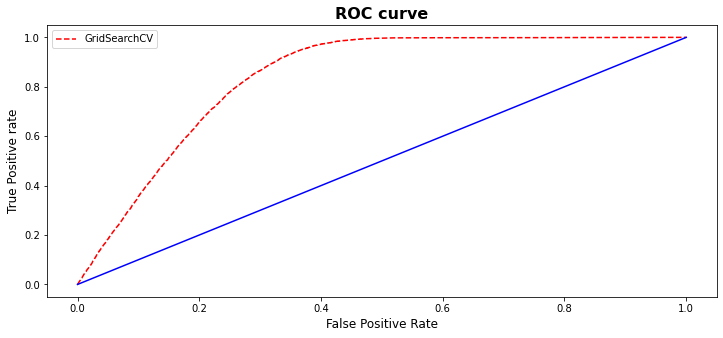

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model3_classifier_CV, X_test, y_test, y_pred_test)
plot_roc_curve(model3_classifier_CV, X_test, y_test, y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

We used GridSearch Cv technique for hyperparameter tuning for Random forest.

### ML Model - 4 **[** **KNeighborsClassifier** **]**

In [ ]:
# ML Model - 4 Implementation(KNeighborsClassifier)
model4 = KNeighborsClassifier()
# Fit the Algorithm
model4 = model4.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model4.predict(X_ros)
y_pred_test = model4.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_kn_train = accuracy_score(y_ros, y_pred_train)
ps_kn_train = precision_score(y_ros, y_pred_train)
rs_kn_train = recall_score(y_ros, y_pred_train)
f1s_kn_train = f1_score(y_ros, y_pred_train)
ras_kn_train = roc_auc_score(y_ros, y_pred_train)
print(ps_kn_train,rs_kn_train,f1s_kn_train,ras_kn_train)

0.8716312056737588 0.9423894788421041 0.9056303322987004 0.901799907984754


In [ ]:
# Checking the Performance on test set
as_kn_test = accuracy_score(y_test, y_pred_test)
ps_kn_test = precision_score(y_test, y_pred_test)
rs_kn_test = recall_score(y_test, y_pred_test)
f1s_kn_test = f1_score(y_test, y_pred_test)
ras_kn_test = roc_auc_score(y_test, y_pred_test)
print(as_kn_test,ps_kn_test,rs_kn_test,f1s_kn_test,ras_kn_test)

0.7833302720999187 0.2945914201017954 0.5743729552889858 0.3894413841546822 0.693140065904351


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

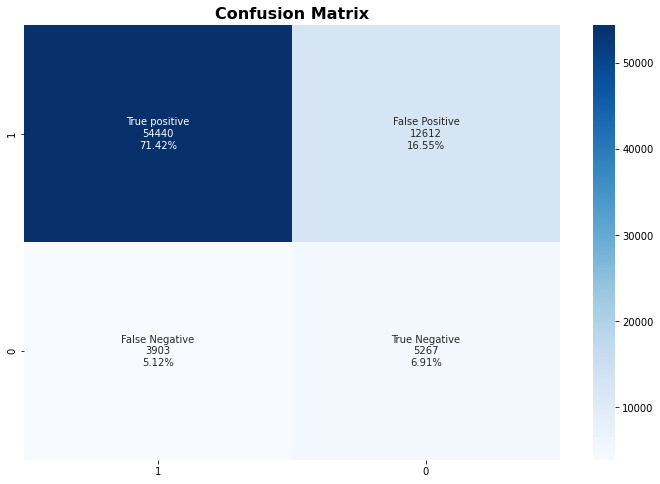

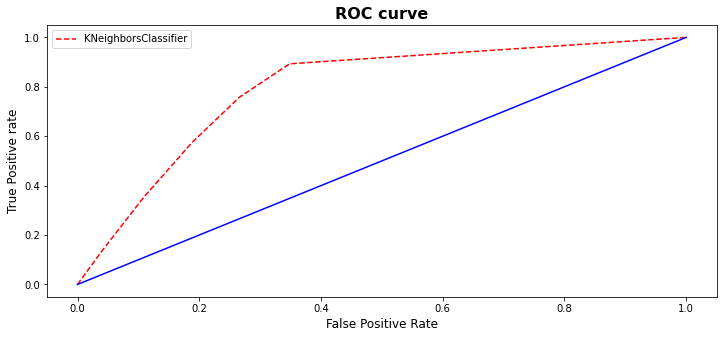

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model4, X_test, y_test, y_pred_test)
plot_roc_curve(model4, X_test, y_test, y_pred_test)

### ML Model - 5 **[** **Gaussian Naive Bayes** **]**

In [ ]:
# ML Model - 5 Implementation(GaussianNB)
model5 = GaussianNB()
# Fit the Algorithm
model5 = model5.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model5.predict(X_ros)
y_pred_test = model5.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_GNB_train = accuracy_score(y_ros, y_pred_train)
ps_GNB_train = precision_score(y_ros, y_pred_train)
rs_GNB_train = recall_score(y_ros, y_pred_train)
f1s_GNB_train = f1_score(y_ros, y_pred_train)
ras_GNB_train = roc_auc_score(y_ros, y_pred_train)
print(as_GNB_train,ps_GNB_train, rs_GNB_train, f1s_GNB_train, ras_GNB_train)

0.7768873411708379 0.7017370781984967 0.9631452756155857 0.81191893234114 0.7768873411708379


In [ ]:
# Checking the Performance on test set
as_GNB_test = accuracy_score(y_test, y_pred_test)
ps_GNB_test = precision_score(y_test, y_pred_test)
rs_GNB_test = recall_score(y_test, y_pred_test)
f1s_GNB_test = f1_score(y_test, y_pred_test)
ras_GNB_test = roc_auc_score(y_test, y_pred_test)
print(as_GNB_test,ps_GNB_test,rs_GNB_test, f1s_GNB_test,ras_GNB_test)

0.6402088635826927 0.24745434421693416 0.9752453653217013 0.3947472964025602 0.784817397210752


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

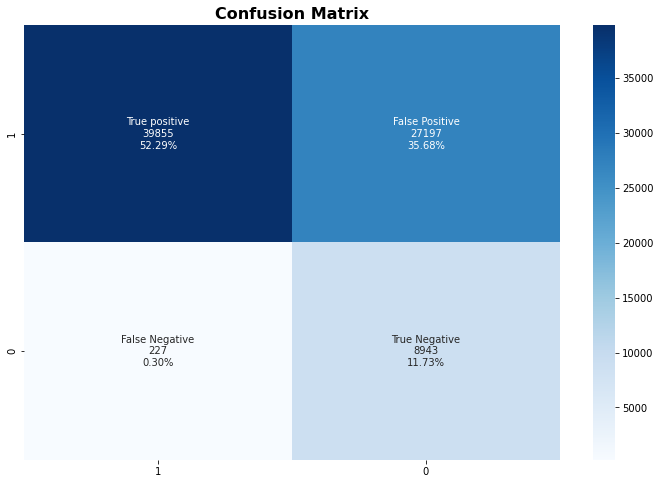

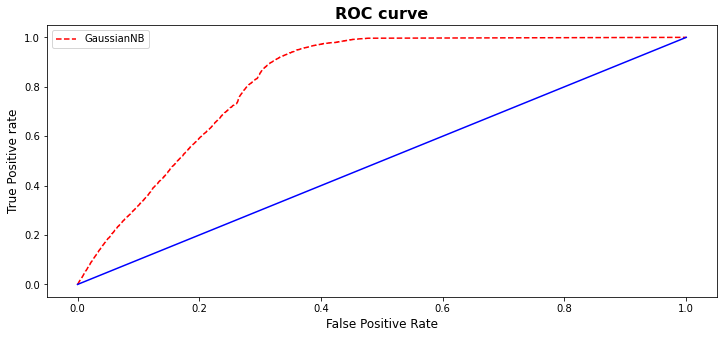

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model5, X_test, y_test, y_pred_test)
plot_roc_curve(model5, X_test, y_test, y_pred_test)

### ML Model - 6 **[** **GradientBoostingClassifier** **]**

In [ ]:
# ML Model - 6 Implementation(GradientBoostingClassifier)
model6 = GradientBoostingClassifier()
# Fit the Algorithm
model6 = model2.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model6.predict(X_ros)
y_pred_test = model6.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_GB_train = accuracy_score(y_ros, y_pred_train)
ps_GB_train = precision_score(y_ros, y_pred_train)
rs_GB_train = recall_score(y_ros, y_pred_train)
f1s_GB_train = f1_score(y_ros, y_pred_train)
ras_GB_train = roc_auc_score(y_ros, y_pred_train)
print(as_GB_train, ps_GB_train, rs_GB_train, f1s_GB_train,ras_GB_train)

0.9995399237694831 0.9997380641443491 0.9993416795400734 0.9995398325439403 0.9995399237694831


In [ ]:
# Checking the Performance on test set
as_GB_test = accuracy_score(y_test, y_pred_test)
ps_GB_test = precision_score(y_test, y_pred_test)
rs_GB_test = recall_score(y_test, y_pred_test)
f1s_GB_test = f1_score(y_test, y_pred_test)
ras_GB_test = roc_auc_score(y_test, y_pred_test)
print(as_GB_test, ps_GB_test, rs_GB_test, f1s_GB_test, ras_GB_test)

0.8177691480150088 0.2817240103588605 0.3321701199563795 0.3048743869482534 0.6081747813884385


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

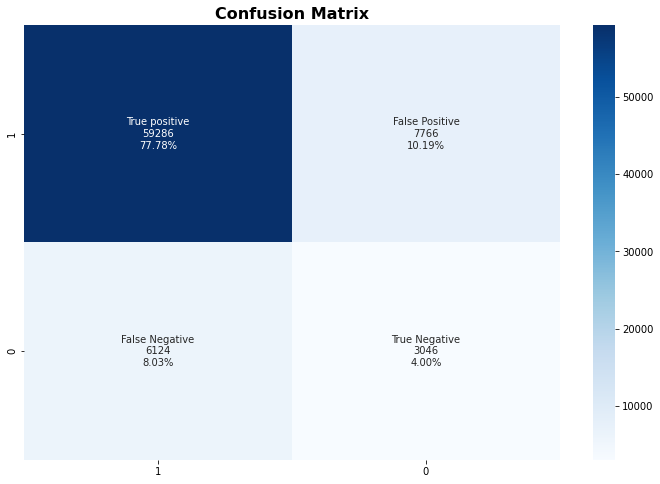

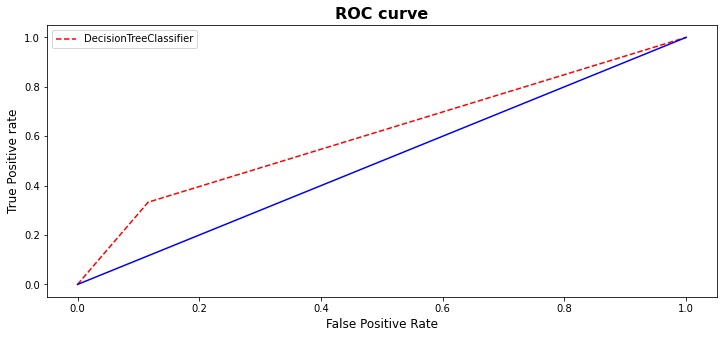

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model6, X_test, y_test, y_pred_test)
plot_roc_curve(model6, X_test, y_test, y_pred_test)

### ML Model - 7 **[** **XGBClassifier** **]**

In [ ]:
# ML Model - 7 Implementation(XGBClassifier)
model7 = XGBClassifier()
# Fit the Algorithm
model7 = model2.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model7.predict(X_ros)
y_pred_test = model7.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_XGB_train = accuracy_score(y_ros, y_pred_train)
ps_XGB_train = precision_score(y_ros, y_pred_train)
rs_XGB_train = recall_score(y_ros, y_pred_train)
f1s_XGB_train = f1_score(y_ros, y_pred_train)
ras_XGB_train = roc_auc_score(y_ros, y_pred_train)
print(as_XGB_train,ps_XGB_train,rs_XGB_train,f1s_XGB_train,ras_XGB_train )

0.9995399237694831 0.9997380641443491 0.9993416795400734 0.9995398325439403 0.9995399237694831


In [ ]:
# Checking the Performance on test set
as_XGB_test = accuracy_score(y_test, y_pred_test)
ps_XGB_test = precision_score(y_test, y_pred_test)
rs_XGB_test = recall_score(y_test, y_pred_test)
f1s_XGB_test = f1_score(y_test, y_pred_test)
ras_XGB_test = roc_auc_score(y_test, y_pred_test)
print(as_XGB_test,ps_XGB_test, rs_XGB_test, f1s_XGB_test,ras_XGB_test)

0.8181102568812154 0.2832070940328838 0.33435114503816793 0.3066613322664533 0.6093100353240711


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

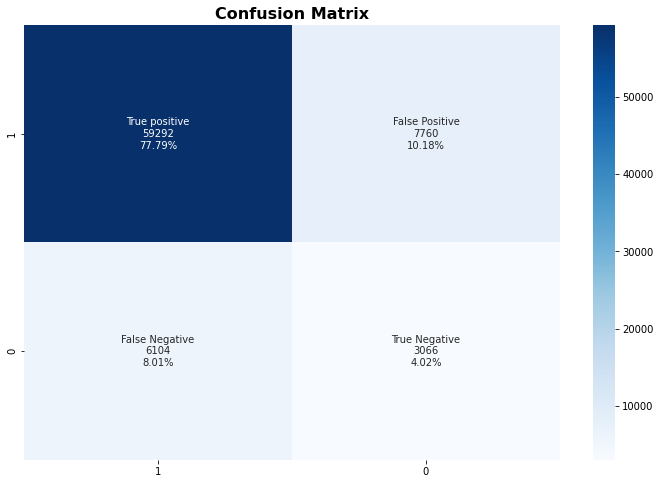

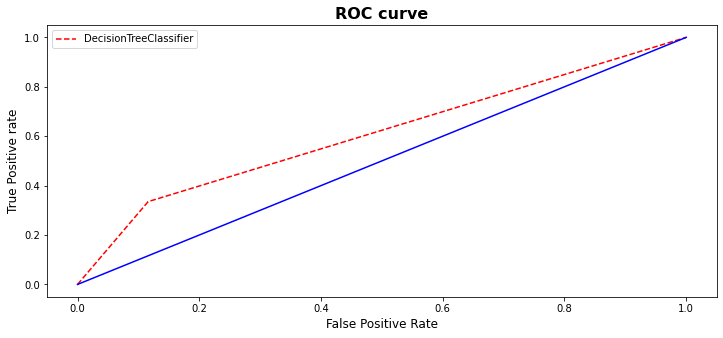

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model7, X_test, y_test, y_pred_test)
plot_roc_curve(model7, X_test, y_test, y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model7_classifier = XGBClassifier(random_state=5,max_depth=5)

# Fit the Algorithm
model7_classifier.fit(X_ros, y_ros)

# Predict on the model
y_pred_train =  model7_classifier.predict(X_ros)
y_pred_test  = model7_classifier.predict(X_test)

In [ ]:
# Evaluation_metrics
evaluation_metrics(model7_classifier,y_test,y_pred_test)

   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score
0        0.792173   0.321621  0.655834  0.431591       0.733326


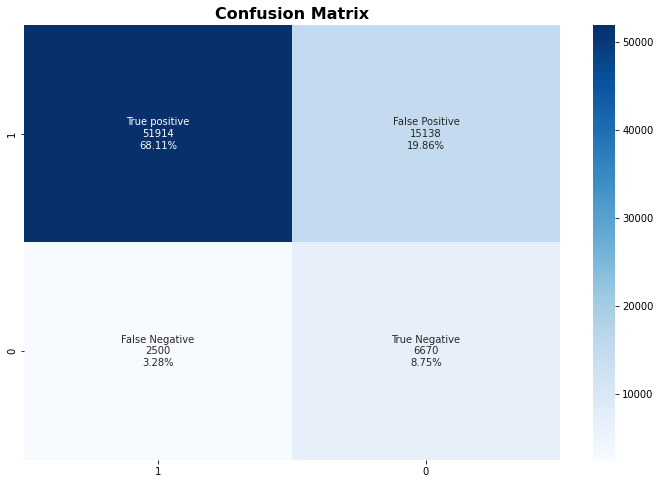

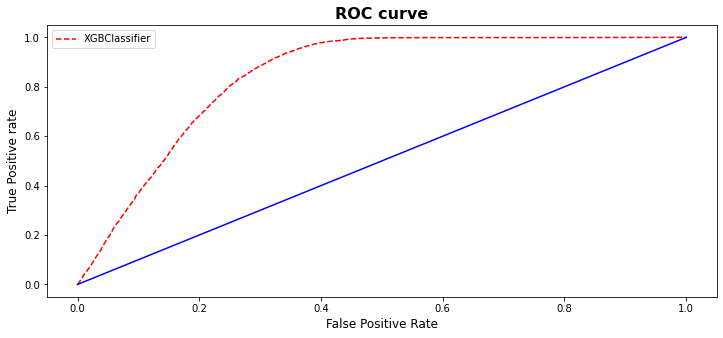

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model7_classifier, X_test, y_test, y_pred_test)
plot_roc_curve(model7_classifier, X_test, y_test, y_pred_test)

### ML Model - 8 **[** **AdaBoostClassifier** **]**

In [ ]:
# ML Model - 8 Implementation(AdaBoostClassifier)
model8 = AdaBoostClassifier()
# Fit the Algorithm
model8 = model8.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model8.predict(X_ros)
y_pred_test = model8.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_AB_train = accuracy_score(y_ros, y_pred_train)
ps_AB_train = precision_score(y_ros, y_pred_train)
rs_AB_train = recall_score(y_ros, y_pred_train)
f1s_AB_train = f1_score(y_ros, y_pred_train)
ras_AB_train = roc_auc_score(y_ros, y_pred_train)
print(as_AB_train, ps_AB_train,rs_AB_train,f1s_AB_train, ras_AB_train)

0.8403086625247338 0.7904414698849797 0.9261558947734592 0.8529338817353203 0.8403086625247338


In [ ]:
# Checking the Performance on test set
as_AB_test = accuracy_score(y_test, y_pred_test)
ps_AB_test = precision_score(y_test, y_pred_test)
rs_AB_test = recall_score(y_test, y_pred_test)
f1s_AB_test = f1_score(y_test, y_pred_test)
ras_AB_test = roc_auc_score(y_test, y_pred_test)
print(as_AB_test, ps_AB_test, rs_AB_test, f1s_AB_test, ras_AB_test)

0.7585211618692765 0.30318786225707467 0.7757906215921483 0.43598700741557883 0.7659750101339015


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

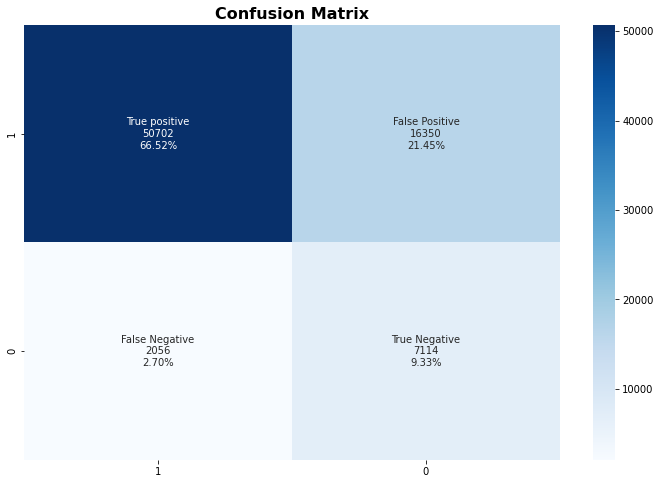

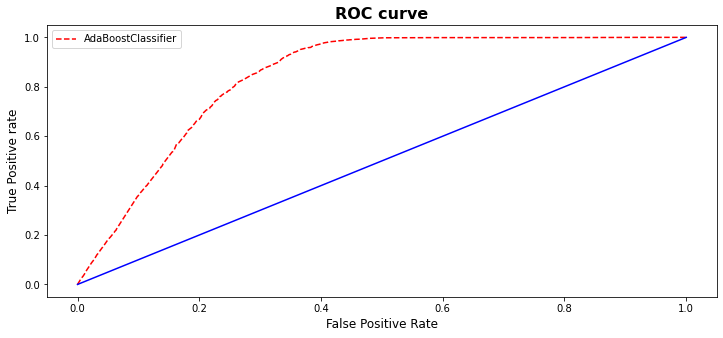

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model8, X_test, y_test, y_pred_test)
plot_roc_curve(model8, X_test, y_test, y_pred_test)

### ML Model - 9 **[** **LGBMClassifier** **]**

**LGBM Classifier**

LightGBM, short for Light Gradient Boosting Machine, is a distributed gradient boosting framework.It uses Histogram based splitting, Gradient-based One-Side Sampling (GOSS) ans Exclusive Feature Bundling (EFB) making it a fast algorithm.

*Hyper-Parameter Tuning for LGBMClassifier:*

n_estimators: Number of Boosting iterations.

learning_rate: This setting is used for reducing the gradient step. It affects the overall time of training: the smaller the value, the more iterations are required for training.

min_data_in_leaf: Minimal number of data in one leaf. Can be used to deal with over-fitting

random_state: Controls the randomness of the estimator.

In [ ]:
# ML Model - 9 Implementation(LGBMClassifier)
model9 = lgbm.LGBMClassifier()
# Fit the Algorithm
model9 = model2.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model9.predict(X_ros)
y_pred_test = model9.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_lgbm_train = accuracy_score(y_ros, y_pred_train)
ps_lgbm_train = precision_score(y_ros, y_pred_train)
rs_lgbm_train = recall_score(y_ros, y_pred_train)
f1s_lgbm_train = f1_score(y_ros, y_pred_train)
ras_lgbm_train = roc_auc_score(y_ros, y_pred_train)
print(as_lgbm_train,ps_lgbm_train, rs_lgbm_train, f1s_lgbm_train, ras_lgbm_train)

0.9995399237694831 0.9997380641443491 0.9993416795400734 0.9995398325439403 0.9995399237694831


In [ ]:
# Checking the Performance on test set
as_lgbm_test = accuracy_score(y_test, y_pred_test)
ps_lgbm_test = precision_score(y_test, y_pred_test)
rs_lgbm_test = recall_score(y_test, y_pred_test)
f1s_lgbm_test = f1_score(y_test, y_pred_test)
ras_lgbm_test = roc_auc_score(y_test, y_pred_test)
print(as_lgbm_test,ps_lgbm_test, rs_lgbm_test,f1s_lgbm_test, ras_lgbm_test)

0.8182808113143187 0.2831464838321134 0.3332606324972737 0.3061664078545308 0.6089362877334547


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

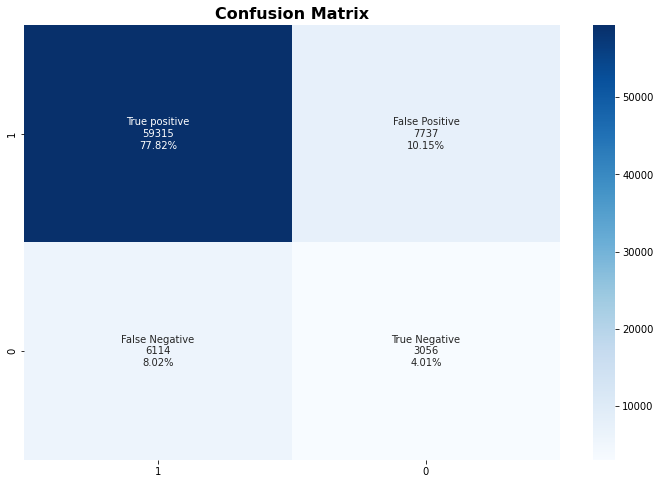

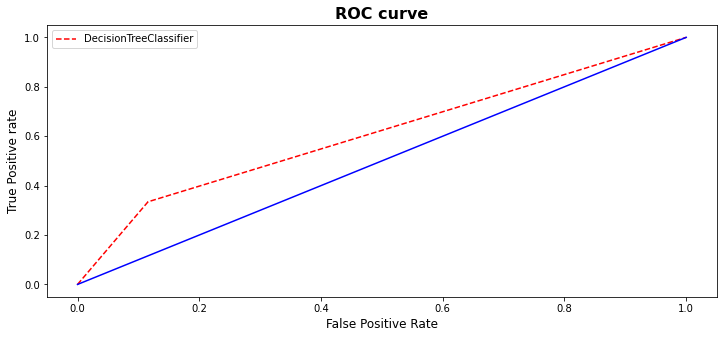

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model9, X_test, y_test, y_pred_test)
plot_roc_curve(model9, X_test, y_test, y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 9 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model9_classifier = lgbm.LGBMClassifier()
parameters_lgbm = {'n_estimators':[50,70,100], "max_depth" : [25,50],'random_state':[24],
                   'min_data_in_leaf':[200,300],'learning_rate':[.001,0.01]}
model9_classifier_CV = GridSearchCV(model9_classifier, param_grid = parameters_lgbm, scoring = 'roc_auc', cv=3,verbose=2)
# Fit the Algorithm
model9_classifier_CV.fit(X_ros, y_ros)
# Predict on the model
y_pred_train = model9_classifier_CV.best_estimator_.predict(X_ros)
y_pred_test = model9_classifier_CV.best_estimator_.predict(X_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=50, random_state=24; total time=   2.5s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=50, random_state=24; total time=   2.6s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=50, random_state=24; total time=   2.5s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=70, random_state=24; total time=   3.2s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=70, random_state=24; total time=   3.3s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=70, random_state=24; total time=   3.3s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=100, random_state=24; total time=   4.5s
[CV] END learning_rate=0.001, max_depth=25, min_data_in_leaf=200, n_estimators=100, random_state=24; tota

In [ ]:
model9_classifier_CV.best_estimator_

LGBMClassifier(learning_rate=0.01, max_depth=25, min_data_in_leaf=200,
               random_state=24)

In [ ]:
# Evaluation_metrics
evaluation_metrics(model9_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score
0        0.768597   0.305851  0.727372  0.430628       0.750803


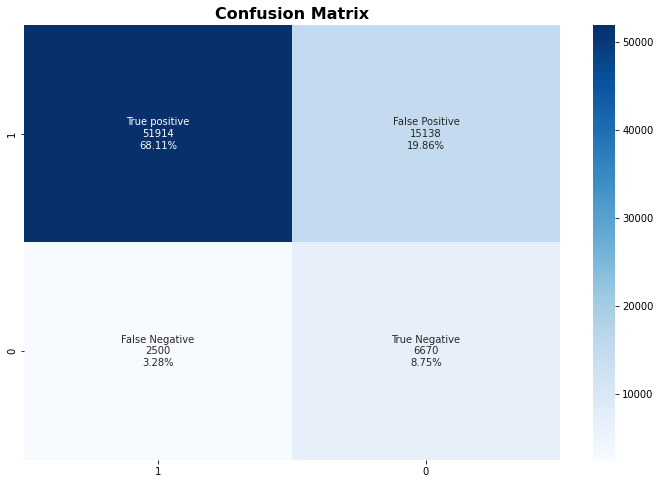

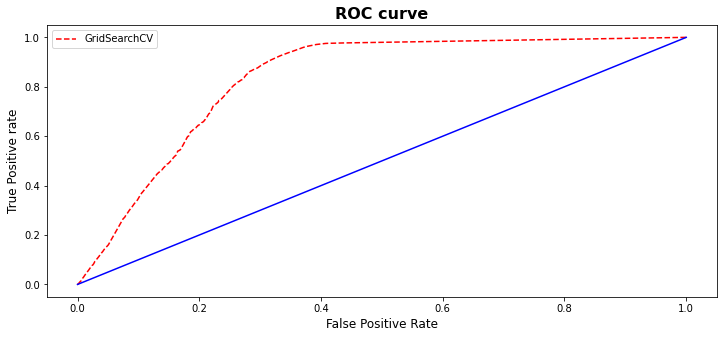

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model9_classifier_CV, X_test, y_test, y_pred_test)
plot_roc_curve(model9_classifier_CV, X_test, y_test, y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV hyperparameter tuning technique for LGBMClassifier.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparameter ROC_AUC Score improved by 0.15%, before it was 0.60% and now its 0.75%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used the following Evaluation Metrics:

Accuracy Score,
Precision,
Recall,
F1 Score,
ROC AUC Score.
At the end of every model, there is one ROC Curve which shows the ROC Scores and Parallel Coordinates Plot which shows all the combinations of hyper-parameters used for tuning the model to get the best parameters.

Because our dataset is imbalanced and accuracy can be misleading.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The best ML model for our dataset are 'DecisionTreeClassifier','RandomForestClassifier', 'XGBClassifier', 'LGBMClassifier'. As seen in confusion matrix, these models performed well compared with others with test accuray score of 82%.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Models
models=[]
models.append(('LogisticRegression', LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest', RandomForestClassifier(random_state=5)))
models.append(('knn', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LGBMClassifier', lgbm.LGBMClassifier()))

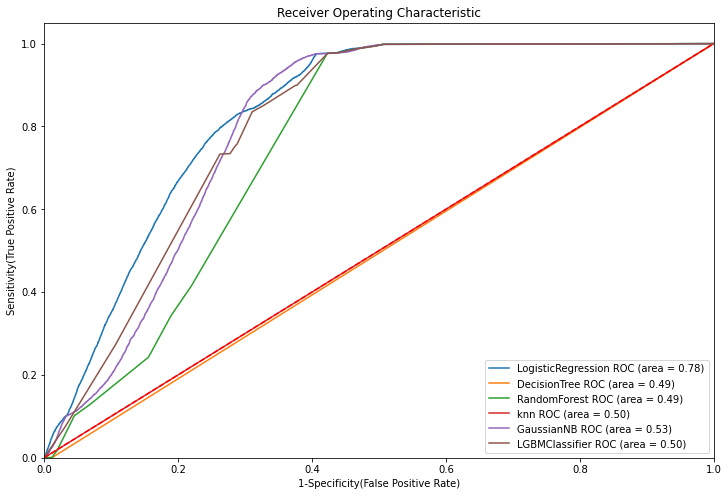

In [ ]:
for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc =roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

### Feature Importance

In [ ]:
importances = model3.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
9       Vehicle_Damage_No                0.15
5                 Vintage                0.13
3          Annual_Premium                0.12
1             Region_Code                0.11
10     Vehicle_Damage_Yes                0.11
0                     Age                0.10
2      Previously_Insured                0.10
4    Policy_Sales_Channel                0.08
7    Vehicle_Age_< 1 Year                0.06
6    Vehicle_Age_1-2 Year                0.03
8   Vehicle_Age_> 2 Years                0.02

The most significant features are listed from top to bottom.

We used feature Importance for RandomForestClassifier model and Vehicle_Damage, Vintage, Annual_Premium, Age	are the most important features for our ML models.

# **Conclusion**

In [ ]:
# All models Evaluation metric
Score_df = pd.DataFrame({'Classifications':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB','GradientBoostingClassifier','XGBClassifier','AdaBoostClassifier','LGBMClassifier'],
                         'Train_accuracy':[accuracy_score_train, as_dt_train, as_rf_train, as_kn_train, as_GNB_train, as_GB_train,as_XGB_train, as_AB_train, as_lgbm_train],
                         'Test_accuracy':[accuracy_score_test, as_dt_test, as_rf_test, as_kn_test, as_GNB_test, as_GB_test,as_XGB_test, as_AB_test, as_lgbm_test],
                         'Train_precision':[precision_score_train, ps_dt_train, ps_rf_train, ps_kn_train, ps_GNB_train, ps_GB_train, ps_XGB_train, ps_AB_train, ps_lgbm_train],
                         'Test_precision':[precision_score_test, ps_dt_test, ps_rf_test, ps_kn_test, ps_GNB_test, ps_GB_test,ps_XGB_test, ps_AB_test, ps_lgbm_test],
                         'Train_recall':[recall_score_train, rs_dt_train, rs_rf_train, rs_kn_train, rs_GNB_train, rs_GB_train,rs_XGB_train, rs_AB_train, rs_lgbm_train],
                         'Test_recall':[recall_score_test, rs_dt_test, rs_rf_test, rs_kn_test, rs_GNB_test, rs_GB_test, rs_XGB_test, rs_AB_test, rs_lgbm_test],
                         'Train_f1_score':[f1_score_train, f1s_dt_train, f1s_rf_train, f1s_kn_train, f1s_GNB_train,  f1s_GB_train, f1s_XGB_train, f1s_AB_train, f1s_lgbm_train],
                         'Test_f1_score':[f1_score_test, f1s_dt_test, f1s_rf_test, f1s_kn_test, f1s_GNB_test,  f1s_GB_test,f1s_XGB_test, f1s_AB_test, f1s_lgbm_test],
                         'Train_ROC-AUC':[roc_auc_score_train, ras_dt_train, ras_rf_train, ras_kn_train, ras_GNB_train,  ras_GB_train,ras_XGB_train, ras_AB_train, ras_lgbm_train],
                         'Test_ROC-AUC':[roc_auc_score_test, ras_dt_test, ras_rf_test, ras_kn_test, ras_GNB_test,  ras_GB_test,ras_XGB_test, ras_AB_test, ras_lgbm_test]})

In [ ]:
# Comparsion of models
Score_df

Classifications  Train_accuracy  Test_accuracy  Train_precision  \
0          LogisticRegression        0.826592       0.745953         0.779897   
1      DecisionTreeClassifier        0.999540       0.818228         0.999738   
2      RandomForestClassifier        0.999536       0.827609         0.999290   
3        KNeighborsClassifier        0.901800       0.783330         0.871631   
4                  GaussianNB        0.776887       0.640209         0.701737   
5  GradientBoostingClassifier        0.999540       0.817769         0.999738   
6               XGBClassifier        0.999540       0.818110         0.999738   
7          AdaBoostClassifier        0.840309       0.758521         0.790441   
8              LGBMClassifier        0.999540       0.818281         0.999738   

   Test_precision  Train_recall  Test_recall  Train_f1_score  Test_f1_score  \
0        0.288647      0.910008     0.759106        0.839944       0.418254   
1        0.283763      0.999342     0.335224        0.999540       0.307354   
2        0.319085      0.999783     0.381788        0.999536       0.347632   
3        0.294591      0.942389     0.574373        0.905630       0.389441   
4        0.247454      0.963145     0.975245        0.811919       0.394747   
5        0.281724      0.999342     0.332170        0.999540       0.304874   
6        0.283207      0.999342     0.334351        0.999540       0.306661   
7        0.303188      0.926156     0.775791        0.852934       0.435987   
8        0.283146      0.999342     0.333261        0.999540       0.306166   

   Train_ROC-AUC  Test_ROC-AUC  
0       0.826592      0.751630  
1       0.999540      0.609754  
2       0.999536      0.635184  
3       0.901800      0.693140  
4       0.776887      0.784817  
5       0.999540      0.608175  
6       0.999540      0.609310  
7       0.840309      0.765975  
8       0.999540      0.608936

## Conclusion
After loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process ML algorithms.

Through Exploratory Data Analysis, we categorized Age as YoungAge, MiddleAge, and OldAge. Further, we observed that customers belonging to youngAge are more interested in vehicle insurance. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance.

For Feature Selection, We used feature imortance and we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the numeric features.

Next we implemented nine machine learning algorithms namely,  'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'XGBClassifier', 'AdaBoostClassifier', 'LGBMClassifier'. We did hyperparameter tuning into improve our models performance.
The 'RandomForestClassifier', 'XGBClassifier', 'LGBMClassifier' models are best performing models with test accuracy score of 82% but we have an imbalance dataset, So we have to consider precision and recall and roc_auc score as well,  accuracy alone can be misleading.

Key points:

Customers of age between 30 to 60 are more likely to buy insurance.

Customers with Vehicle_Damage are likely to buy insurance.

Customers with Driving License have higher chance of buying Insurance.

The variable Vehicle_damage, Age, Previously_insured, Annual_premium are affecting the target variable.